In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Finally, HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, and LSFs

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

# z= 1.27

In [8]:
z_sys = 1.2776725

## CIV

### CIV 1548 (HIRES)

In [9]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys, 'HIRES')

In [10]:
civ_1548_hires.grab_ion_transition_info()
#civ_1548_hires.grab_ion_transition_info(delta_v=7)

In [11]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)#, delta_wav=0)

In [12]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-40,80], degree=1)

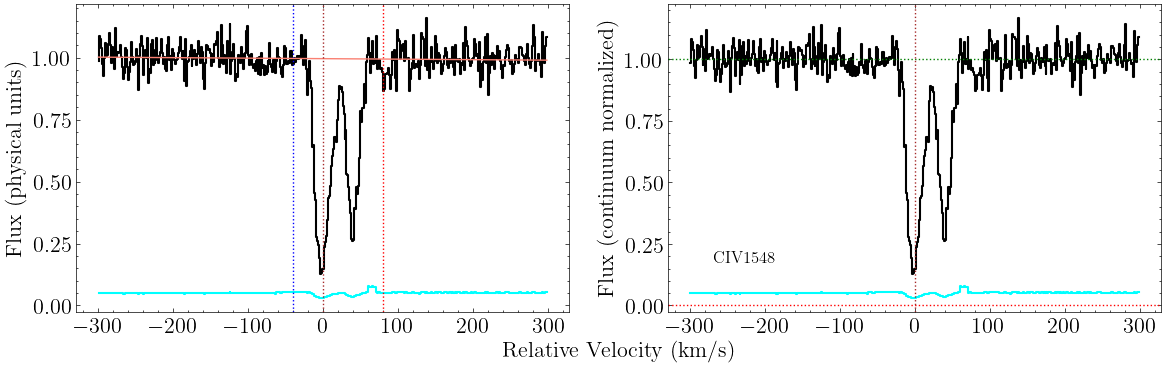

In [13]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

In [14]:
civ_1548_hires.grab_ion_transition_lsf(lsf_fits_list)

In [15]:
civ_1548_hires.init_ion_transition(init_values = np.array([[13.61, 10, 0],[13.42, 10, 39]]), 
                             lsf_convolve = True)

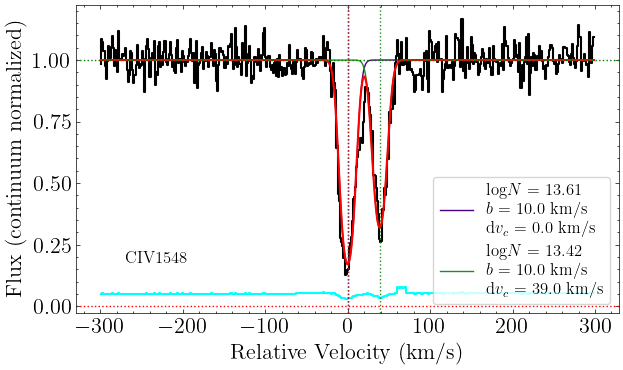

In [16]:
fig, ax = civ_1548_hires.plot_ion_transition_init_fit()

In [17]:
civ_1548_hires.fit_ion_transition()

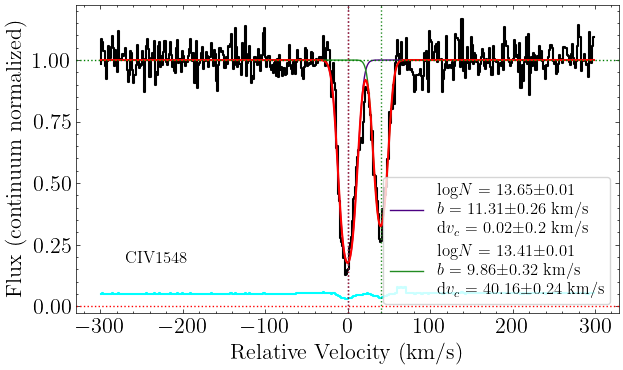

In [18]:
fig, ax = civ_1548_hires.plot_ion_transition_best_fit()

### CIV 1550 (HIRES)

In [19]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys, 'HIRES')

In [20]:
civ_1550_hires.grab_ion_transition_info()
#civ_1550_hires.grab_ion_transition_info(delta_v=7)

In [21]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])#, delta_wav=0)

In [22]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-30,70], degree=1)

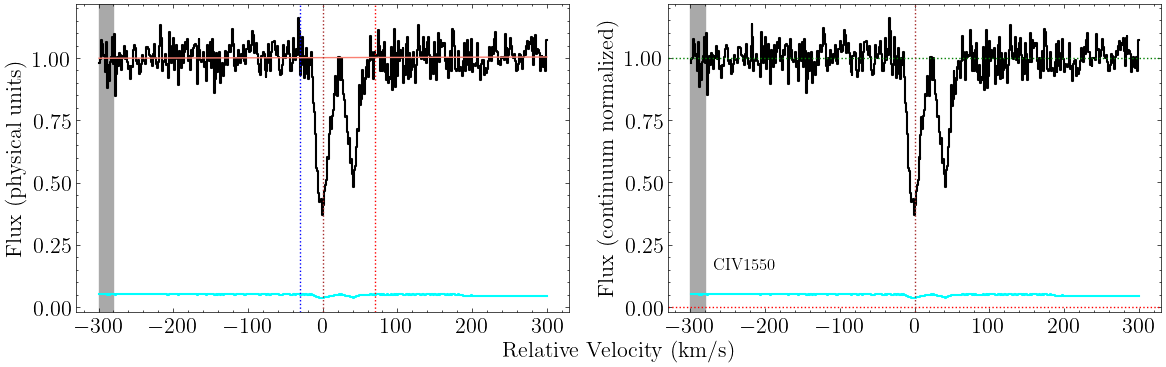

In [23]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

In [24]:
civ_1550_hires.grab_ion_transition_lsf(lsf_fits_list)

In [25]:
civ_1550_hires.init_ion_transition(init_values = np.array([[13.61, 10, 0],[13.42, 10, 39]]), 
                             lsf_convolve = True)

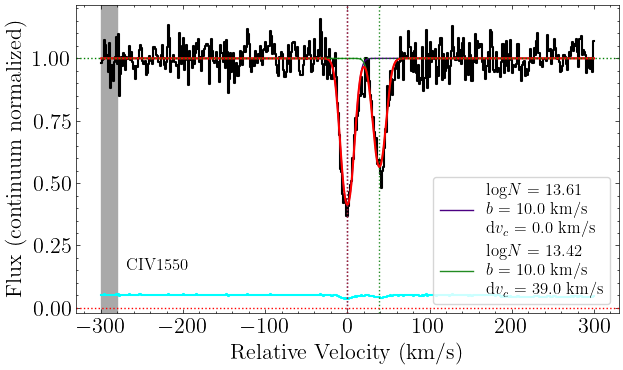

In [26]:
fig, ax = civ_1550_hires.plot_ion_transition_init_fit()

In [27]:
civ_1550_hires.fit_ion_transition()

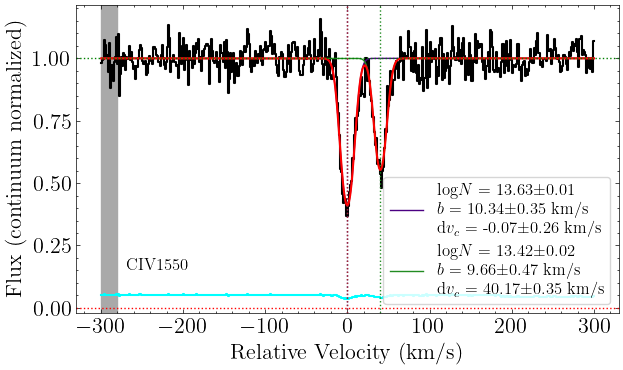

In [28]:
fig, ax = civ_1550_hires.plot_ion_transition_best_fit()

### CIV ion

In [29]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

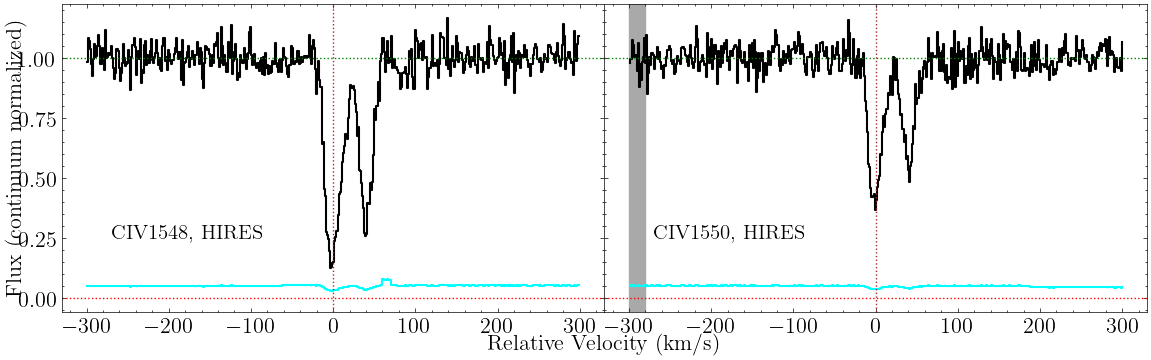

In [30]:
fig, axes = civ.plot_ion()

In [31]:
civ.init_ion([civ_1548_hires.best_values, civ_1548_hires.best_values])
#ciii.init_ion(np.array([[13.42,16,-1.15]]))

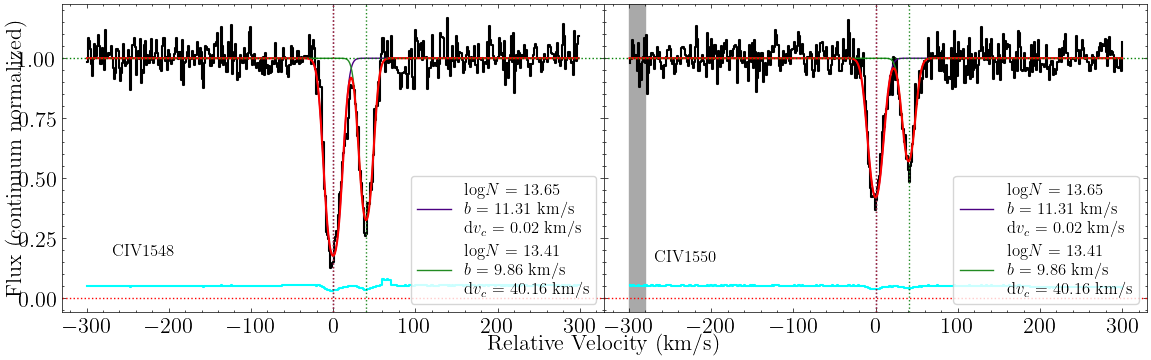

In [32]:
fig, axes = civ.plot_ion_init_fit()

In [33]:
civ.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']
                              ])

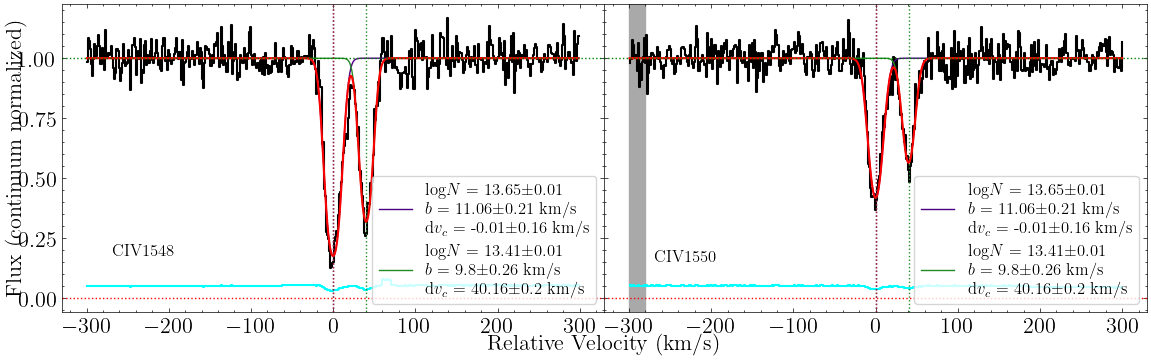

In [34]:
fig, axes = civ.plot_ion_best_fit()

## OIV

### OIV 554 (FUV)

In [35]:
oiv_554_fuv = ion_transition('OIV', 554, 'O', z_sys, 'FUV')

In [36]:
oiv_554_fuv.grab_ion_transition_info()

In [37]:
oiv_554_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120]])#, delta_wav=0)

In [38]:
oiv_554_fuv.cont_norm_flux(v_abs_range=[-70,110], degree=1)

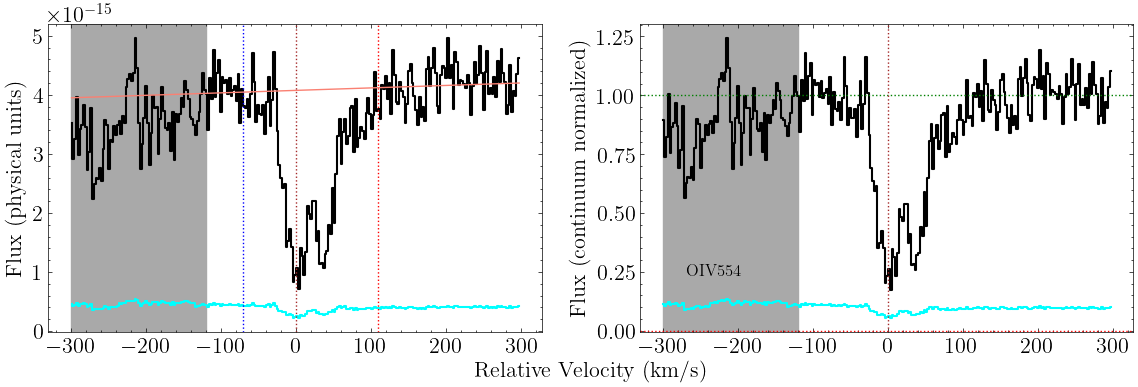

In [39]:
fig, ax = oiv_554_fuv.plot_ion_transition_spec_cont()

In [40]:
oiv_554_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [41]:
oiv_554_fuv.init_ion_transition(init_values = np.array([[14.4, 7, 0], 
                                                     [14.2, 7, 37]]), 
                             lsf_convolve = True)

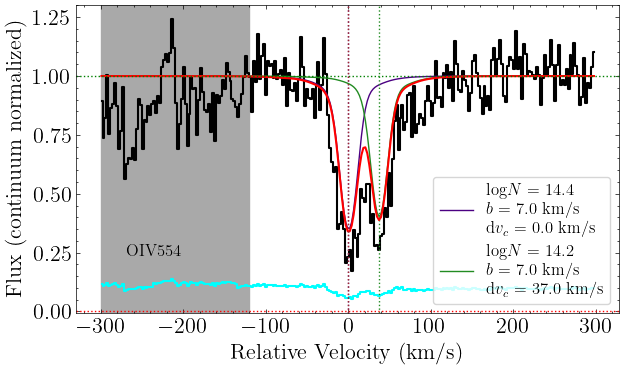

In [42]:
fig, ax = oiv_554_fuv.plot_ion_transition_init_fit()

In [43]:
oiv_554_fuv.fit_ion_transition()

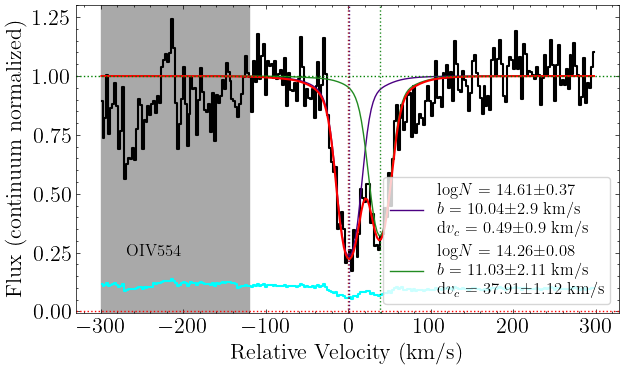

In [44]:
fig, ax = oiv_554_fuv.plot_ion_transition_best_fit()

In [45]:
#delta_wav_1 = (-3.45/3e+5)*oiv_554_fuv.wav0_obs

In [46]:
#delta_wav_1

### OIV 608 (FUV)

In [47]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys, 'FUV')

In [48]:
oiv_608_fuv.grab_ion_transition_info()

In [49]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-230,-120]])#, delta_wav=0)

In [50]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-90,150], degree=1)

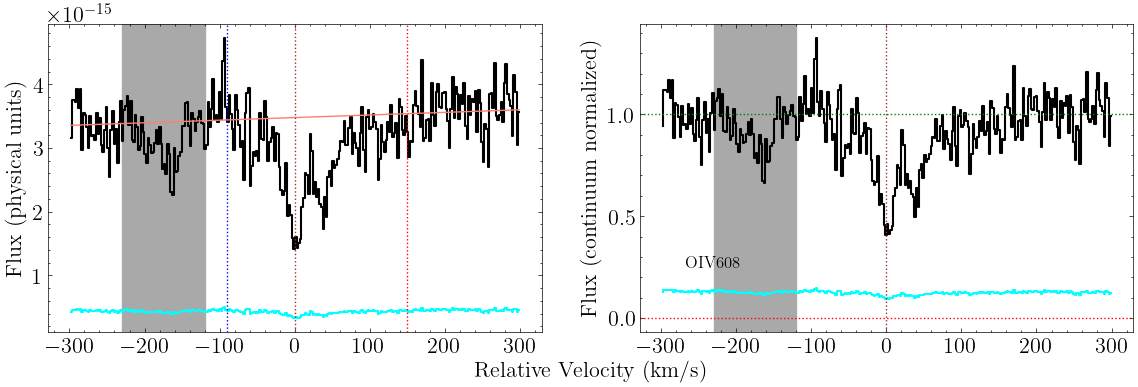

In [51]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

In [52]:
oiv_608_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [53]:
oiv_608_fuv.init_ion_transition(init_values = np.array([[14.4, 7, 0], 
                                                     [14.2, 7, 37]]), 
                             lsf_convolve = True)

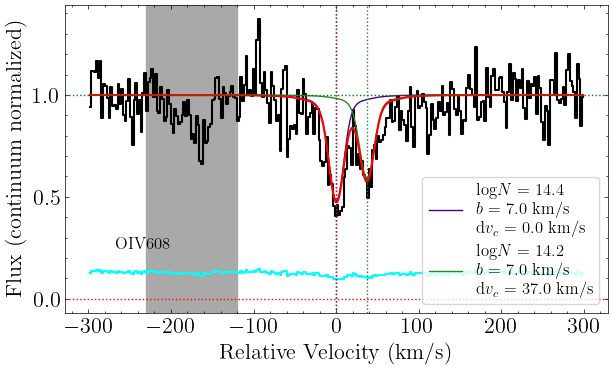

In [54]:
fig, ax = oiv_608_fuv.plot_ion_transition_init_fit()

In [55]:
oiv_608_fuv.fit_ion_transition()

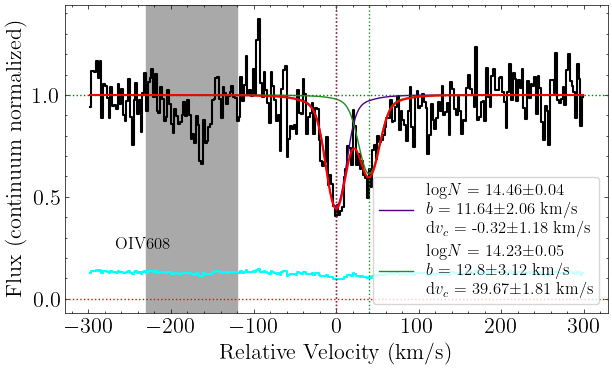

In [56]:
fig, ax = oiv_608_fuv.plot_ion_transition_best_fit()

In [57]:
#delta_wav_2 = (-3.95/3e+5)*oiv_608_fuv.wav0_obs

In [58]:
#delta_wav_2

In [59]:
#.5*(delta_wav_1+delta_wav_2)

### OIV ion

In [60]:
oiv = ion(z_sys, 'OIV', [oiv_554_fuv, oiv_608_fuv])

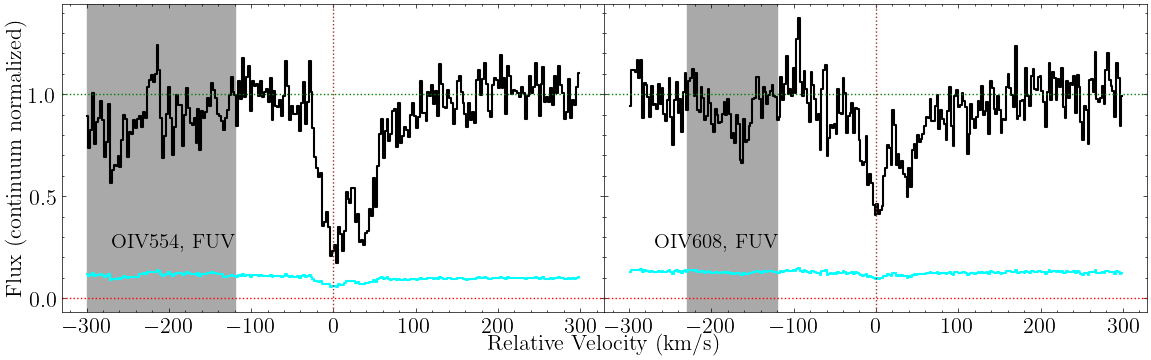

In [61]:
fig, axes = oiv.plot_ion()

In [62]:
oiv.init_ion([oiv_554_fuv.best_values, oiv_554_fuv.best_values])

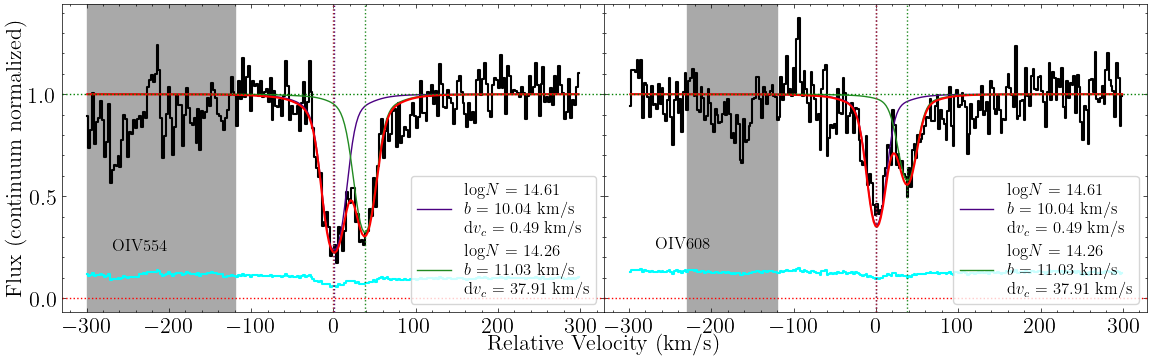

In [63]:
fig, axes = oiv.plot_ion_init_fit()

In [64]:
oiv.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']])

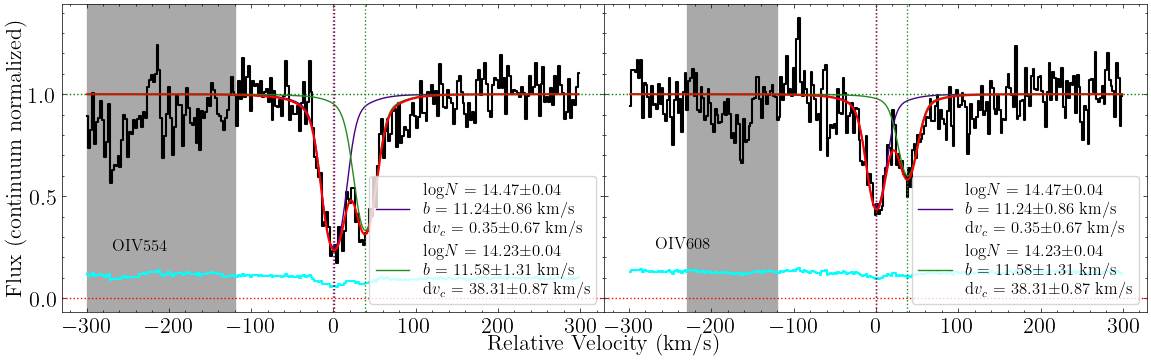

In [65]:
fig, axes = oiv.plot_ion_best_fit()

## CIV + OIV

In [66]:
civ_oiv = ion_suite(z_sys, 'CIV+OIV', [civ, oiv])

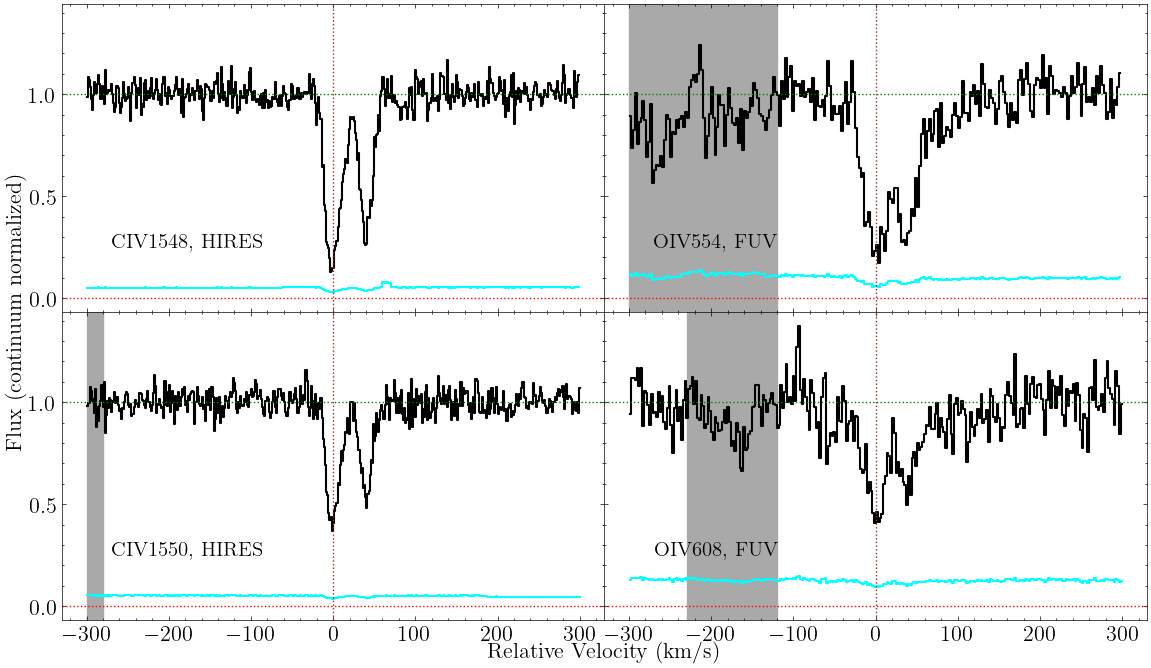

In [67]:
fig, axes = civ_oiv.plot_ion_suite(n_cols=2)

# z=1.16

In [68]:
z_sys = 1.1659124

## CIV

### CIV 1548 (HIRES)

In [69]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys, 'HIRES')

In [70]:
civ_1548_hires.grab_ion_transition_info()

In [71]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [72]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-70,40], degree=1)

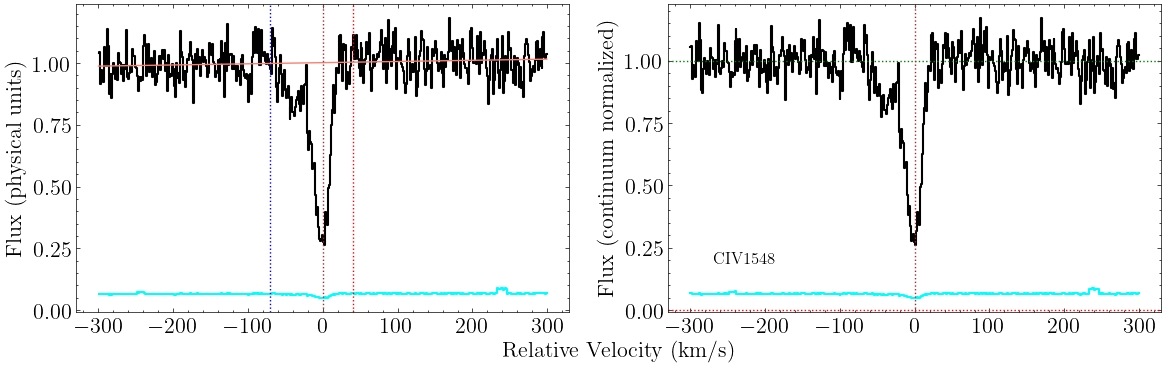

In [73]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

In [74]:
civ_1548_hires.get_EW_total(-70,40)

Integration window: [-70, 40]
EW, 1sig: 120, 4
EW-3sig: 11


In [75]:
civ_1548_hires.grab_ion_transition_lsf(lsf_fits_list)

In [76]:
civ_1548_hires.init_ion_transition(init_values = np.array([[13.45, 11, 0],[12.93, 23, -25]]), 
                             lsf_convolve = True)

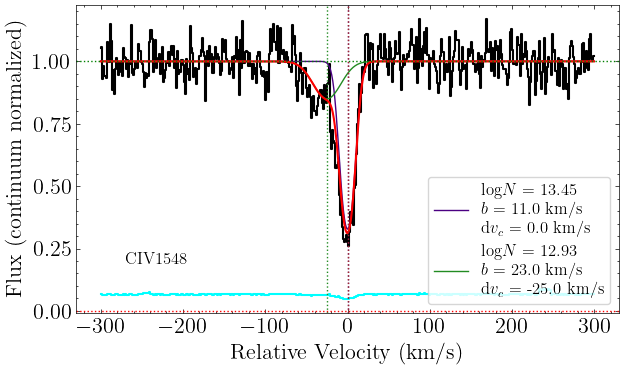

In [77]:
fig, ax = civ_1548_hires.plot_ion_transition_init_fit()

In [78]:
civ_1548_hires.fit_ion_transition()

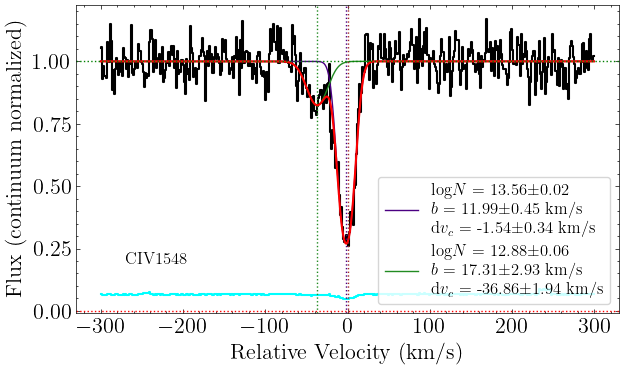

In [79]:
fig, ax = civ_1548_hires.plot_ion_transition_best_fit()

### CIV 1550 (HIRES)

In [80]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys, 'HIRES')

In [81]:
civ_1550_hires.grab_ion_transition_info()

In [82]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])

In [83]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-50,50], degree=1)

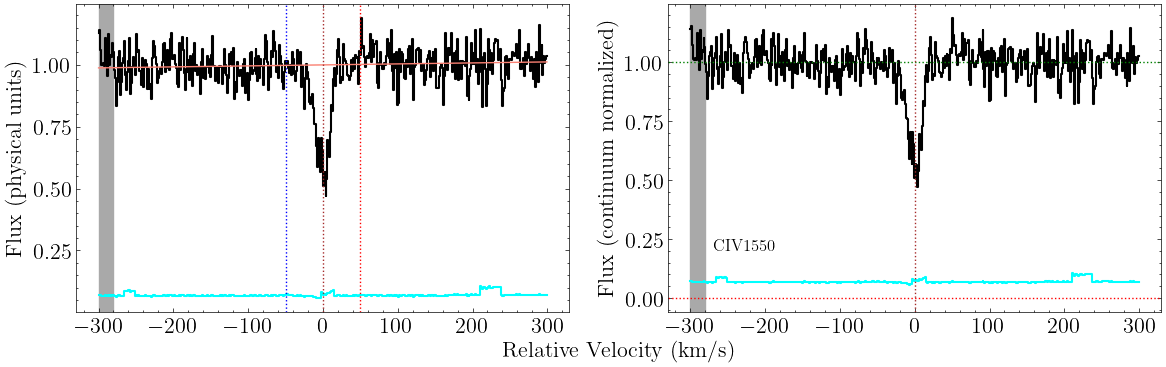

In [84]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

In [85]:
civ_1550_hires.get_EW_total(-50,50)

Integration window: [-50, 50]
EW, 1sig: 55, 4
EW-3sig: 12


In [86]:
civ_1550_hires.grab_ion_transition_lsf(lsf_fits_list)

In [87]:
civ_1550_hires.init_ion_transition(init_values = np.array([[13.45, 11, 0],[12.93, 23, -25]]), 
                             lsf_convolve = True)

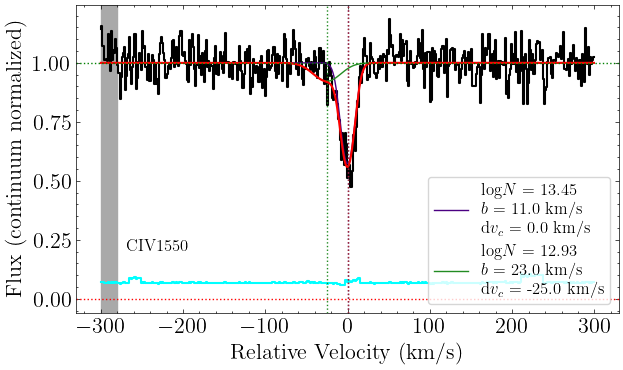

In [88]:
fig, ax = civ_1550_hires.plot_ion_transition_init_fit()

In [89]:
civ_1550_hires.fit_ion_transition()

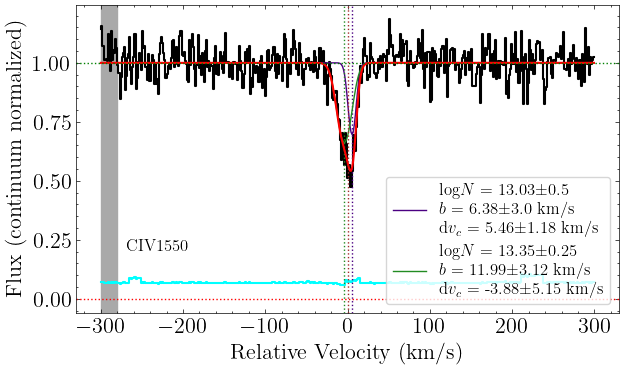

In [90]:
fig, ax = civ_1550_hires.plot_ion_transition_best_fit()

### CIV ion

In [91]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

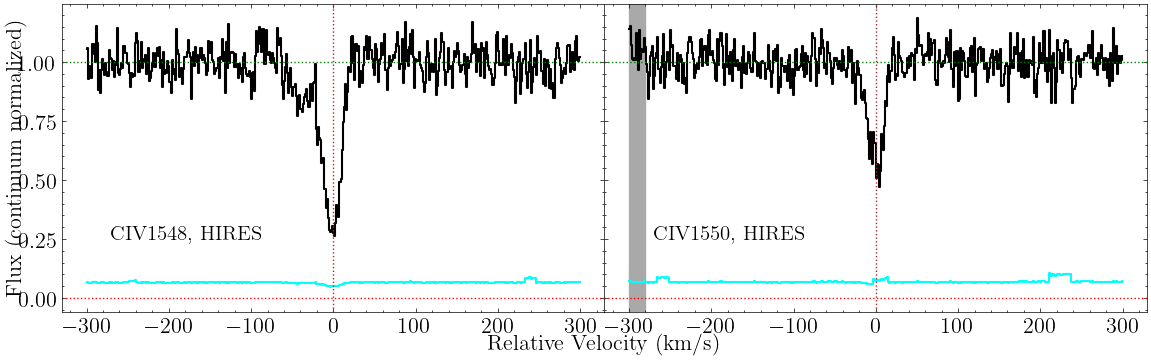

In [92]:
fig, axes = civ.plot_ion()

In [93]:
civ.init_ion([civ_1548_hires.best_values, civ_1548_hires.best_values])
#ciii.init_ion(np.array([[13.42,16,-1.15]]))

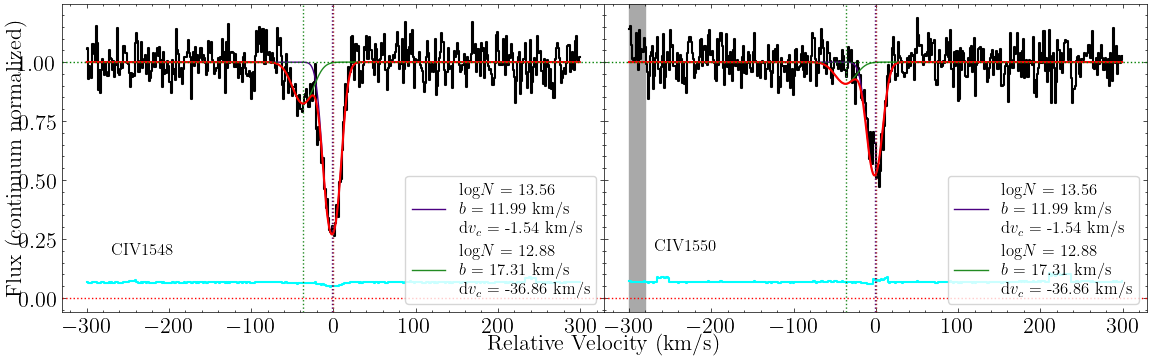

In [94]:
fig, axes = civ.plot_ion_init_fit()

In [95]:
civ.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']
                              ])

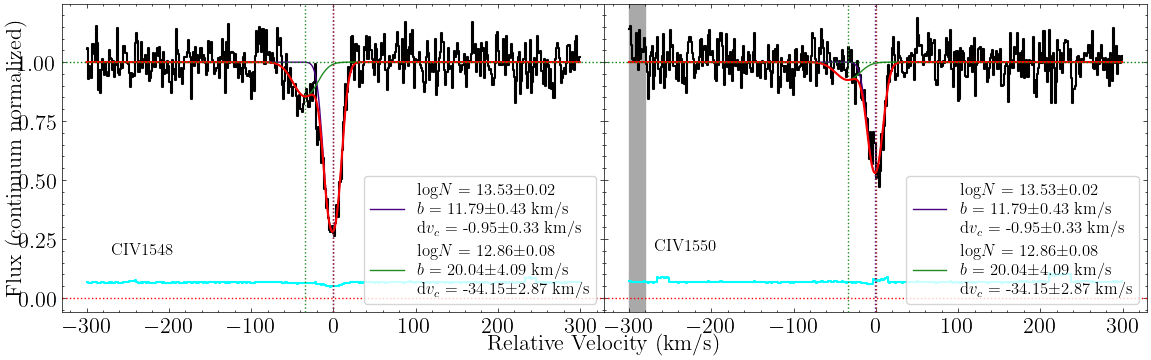

In [96]:
fig, axes = civ.plot_ion_best_fit()

In [97]:
#civ.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_steps=8000)
#civ.fit_ion_emcee(load=True, loaddir=rootdir)

In [98]:
#fig, axes = civ.plot_samples()

In [99]:
#civ.plot_corner()

## CIII

### CIII 977 (STIS)

In [118]:
ciii_977_stis = ion_transition('CIII', 977, 'C', z_sys, 'STIS')

In [119]:
ciii_977_stis.grab_ion_transition_info()

In [121]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-120,-40],[60,170]], delta_wav=0)

In [122]:
ciii_977_stis.cont_norm_flux(v_abs_range=[-60,60], degree=1)

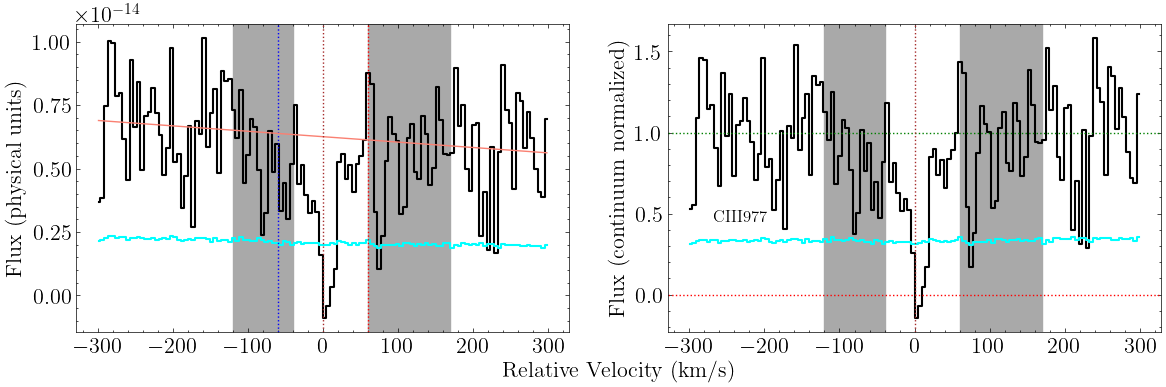

In [123]:
fig, ax = ciii_977_stis.plot_ion_transition_spec_cont()

In [124]:
ciii_977_stis.get_EW_total(-60,60)

Integration window: [-60, 60]
EW, 1sig: 151, 25
EW-3sig: 74


In [125]:
ciii_977_stis.grab_ion_transition_lsf(lsf_fits_list)

In [126]:
ciii_977_stis.init_ion_transition(init_values = np.array([[13.8, 11, 0]]), 
                             lsf_convolve = True)

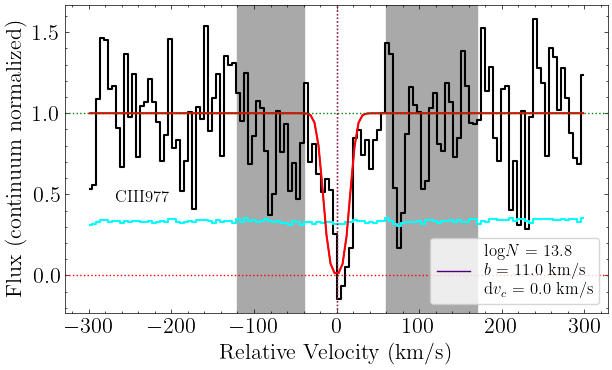

In [127]:
fig, ax = ciii_977_stis.plot_ion_transition_init_fit()

In [128]:
ciii_977_stis.fit_ion_transition()

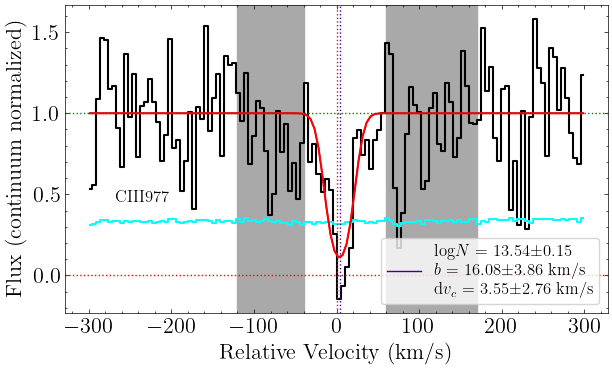

In [129]:
fig, ax = ciii_977_stis.plot_ion_transition_best_fit()

### CIII ion

In [111]:
ciii = ion(z_sys, 'CIII', [ciii_977_stis])

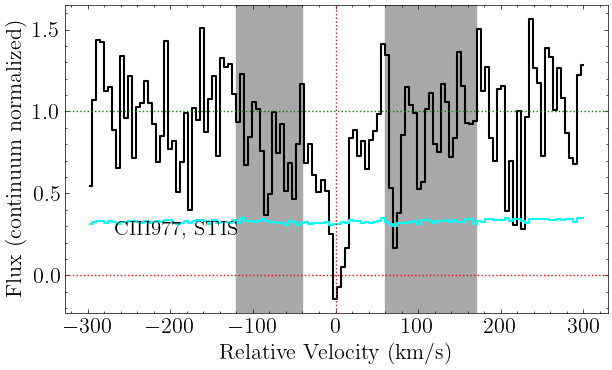

In [112]:
fig, axes = ciii.plot_ion()

In [113]:
ciii.init_ion([[[14.2, 7, 4.2]]])
#ciii.init_ion(np.array([[13.57, 17.10, -0.91]]))

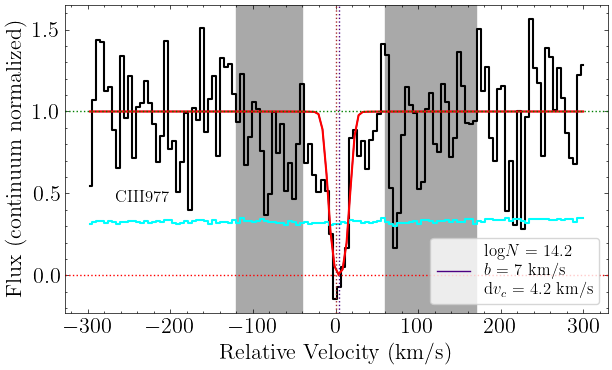

In [114]:
fig, axes = ciii.plot_ion_init_fit()

In [115]:
ciii.fit_ion()#upper_bounds_dict={'it1c1_b':60})

#ciii.fit_ion(lower_bounds_dict={'it1c1_logN':13., 'it1c1_b':5., 'it1c1_dv_c':-40}, 
#             upper_bounds_dict={'it1c1_logN':15., 'it1c1_b':60., 'it1c1_dv_c':40})

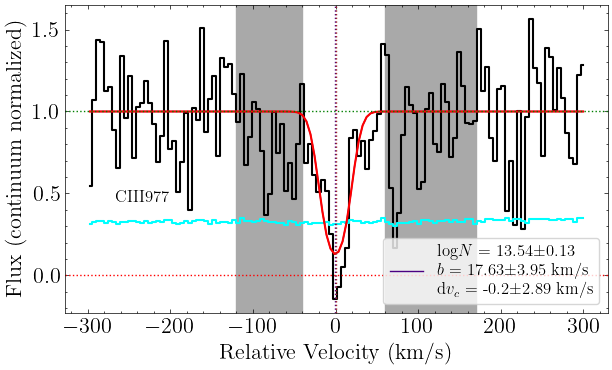

In [116]:
fig, axes = ciii.plot_ion_best_fit()

In [117]:
#3.55*ciii_977_stis.wav0_obs/3e+5

In [117]:
#ciii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_walkers=100, n_steps=2500)
#ciii.fit_ion_emcee(load=True, loaddir=rootdir)

In [118]:
#fig, axes = ciii.plot_samples()

In [119]:
#ciii.plot_corner()

In [120]:
#np.percentile(ciii.result_emcee.flatchain['it1c1_logN'], 100*(1-cdf_3sig))

In [121]:
#np.percentile(ciii.result_emcee.flatchain['it1c1_b'], 100*cdf_3sig)

## SiIII

### SiIII 1206 (STIS)

In [130]:
siiii_1206_stis = ion_transition('SiIII', 1206, 'Si', z_sys, 'STIS')

In [131]:
siiii_1206_stis.grab_ion_transition_info()

In [136]:
siiii_1206_stis.grab_ion_transition_spec(spec_fits_list)

In [137]:
siiii_1206_stis.cont_norm_flux(v_abs_range=[-20,35], degree=1)

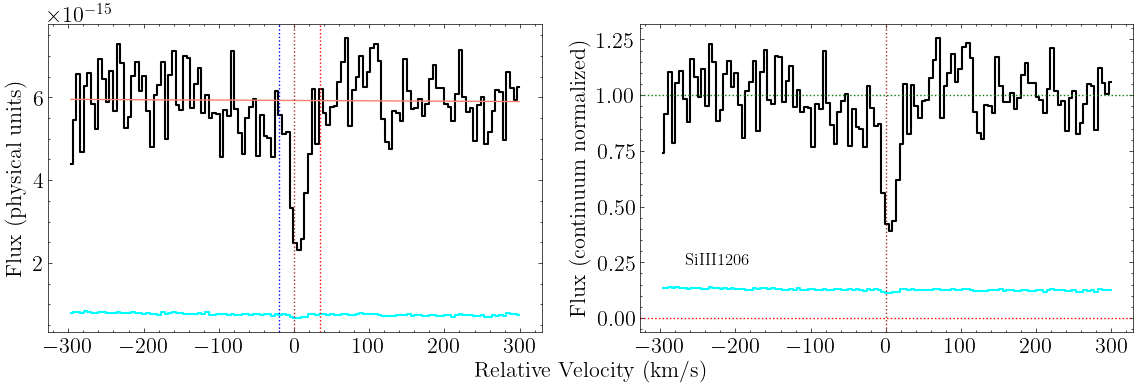

In [138]:
fig, ax = siiii_1206_stis.plot_ion_transition_spec_cont()

In [139]:
siiii_1206_stis.get_EW_total(-20,35)

Integration window: [-20, 35]
EW, 1sig: 60, 8
EW-3sig: 23


In [140]:
siiii_1206_stis.grab_ion_transition_lsf(lsf_fits_list)

In [141]:
siiii_1206_stis.init_ion_transition(init_values = np.array([[12.8, 11, 0]]), 
                             lsf_convolve = True)

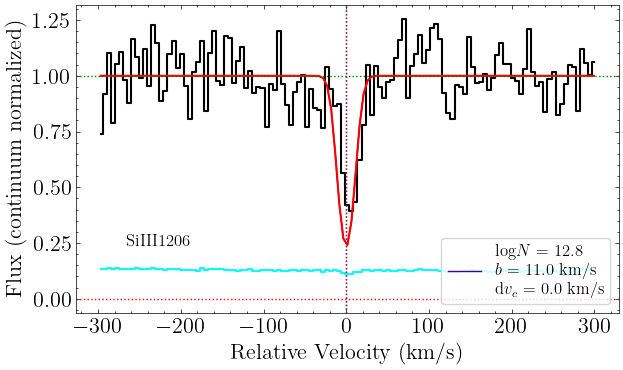

In [142]:
fig, ax = siiii_1206_stis.plot_ion_transition_init_fit()

In [145]:
siiii_1206_stis.fit_ion_transition()#fix_params_list=['it1c1_dv_c'])

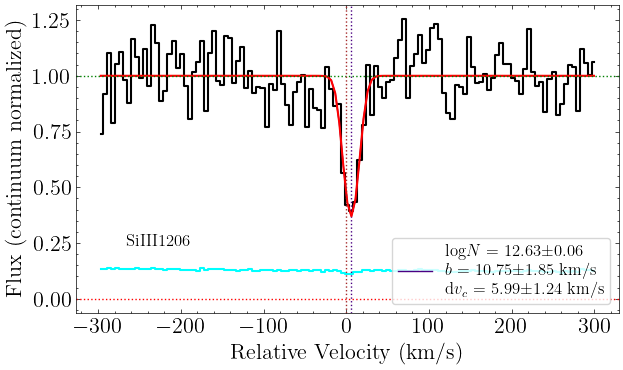

In [146]:
fig, ax = siiii_1206_stis.plot_ion_transition_best_fit()

### SiIII ion

In [147]:
siiii = ion(z_sys, 'SiIII', [siiii_1206_stis])

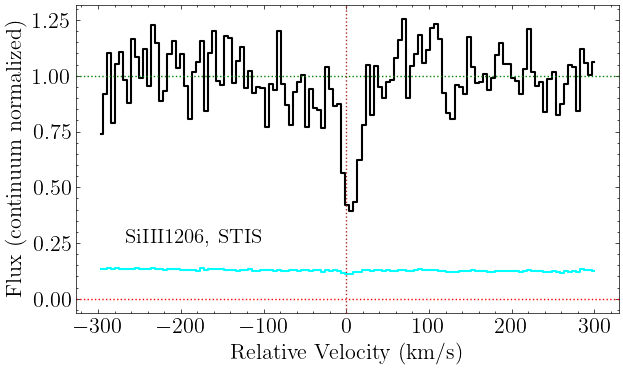

In [148]:
fig, axes = siiii.plot_ion()

In [149]:
siiii.init_ion([[[12.6, 12, 0]]])

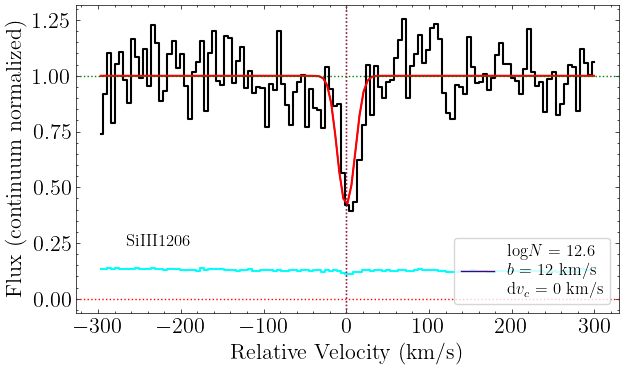

In [150]:
fig, axes = siiii.plot_ion_init_fit()

In [151]:
siiii.fit_ion()

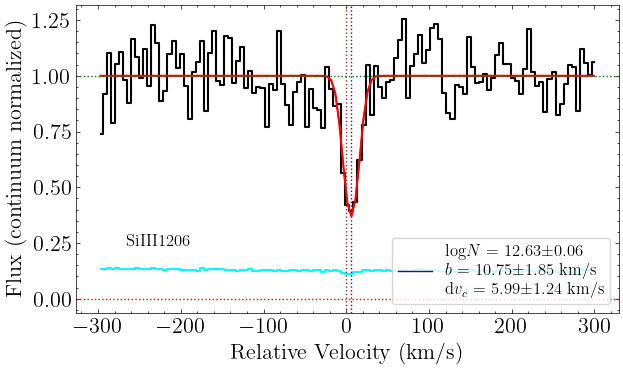

In [152]:
fig, axes = siiii.plot_ion_best_fit()

In [160]:
#5.99*siiii_1206_stis.wav0_obs/3e+5

In [162]:
#.5*(0.025040989404064334+0.052176360434979994)

In [153]:
#siiii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_walkers=200, n_steps=1500)
#siiii.fit_ion_emcee(load=True, loaddir=rootdir)

In [154]:
#fig, axes = siiii.plot_samples()

In [320]:
#siiii.plot_corner()

# z=1.16 Lyman series

In [68]:
z_sys = 1.1659124

## HI 1215 (STIS)

In [69]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [70]:
hi_1215_stis.grab_ion_transition_info()

In [71]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list)

In [72]:
hi_1215_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,120], degree=1)

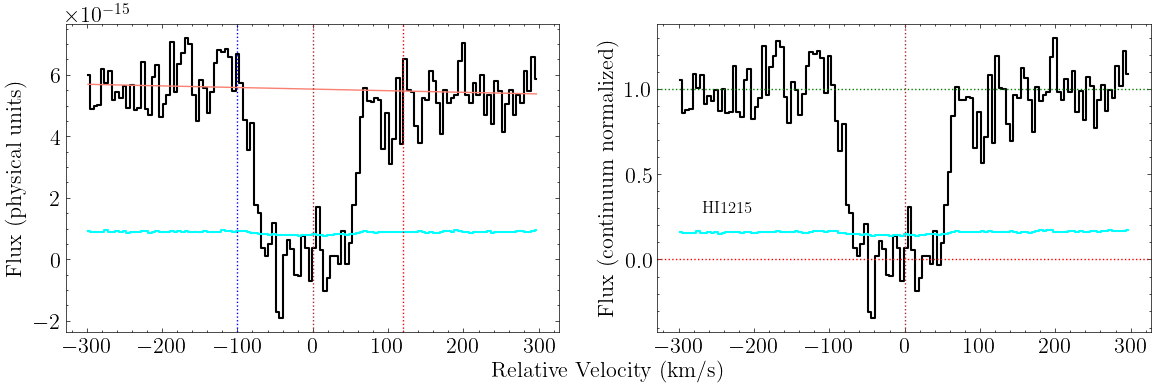

In [73]:
fig, axes = hi_1215_stis.plot_ion_transition_spec_cont()

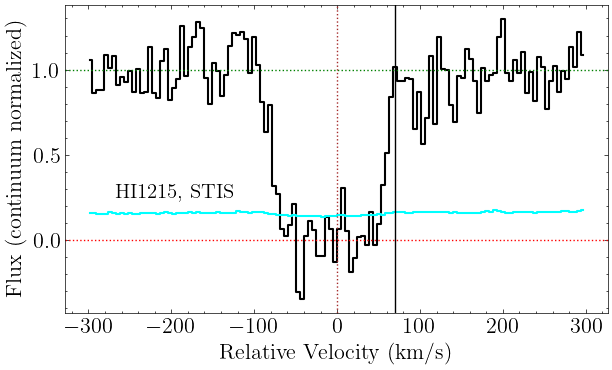

In [74]:
fig, axes = hi_1215_stis.plot_ion_transition_spec()
axes.axvline(70)

In [75]:
hi_1215_stis.get_EW_total(-100,70)

Integration window: [-100, 70]
EW, 1sig: 551, 17
EW-3sig: 52


In [76]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [77]:
hi_1215_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

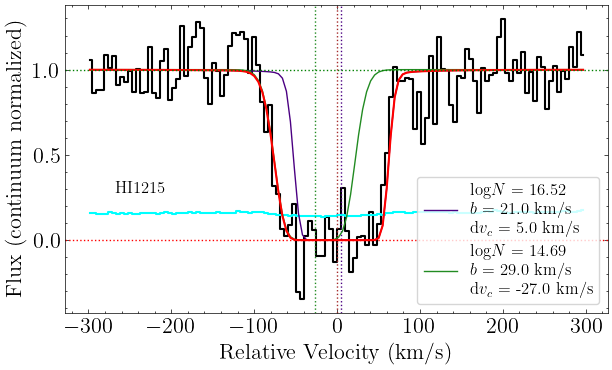

In [78]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit()

In [79]:
hi_1215_stis.fit_ion_transition()

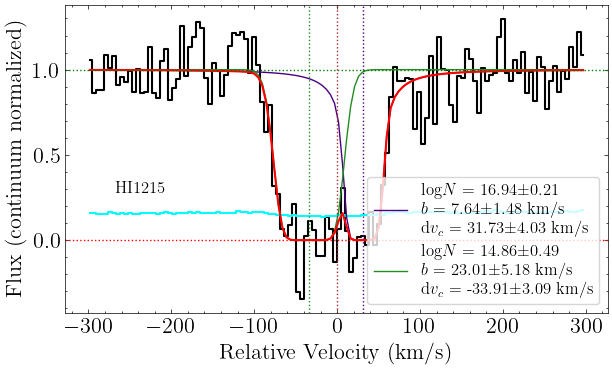

In [80]:
fig, ax = hi_1215_stis.plot_ion_transition_best_fit()

## HI 1025 (STIS)

In [81]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [82]:
hi_1025_stis.grab_ion_transition_info()

In [83]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list)

In [84]:
hi_1025_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

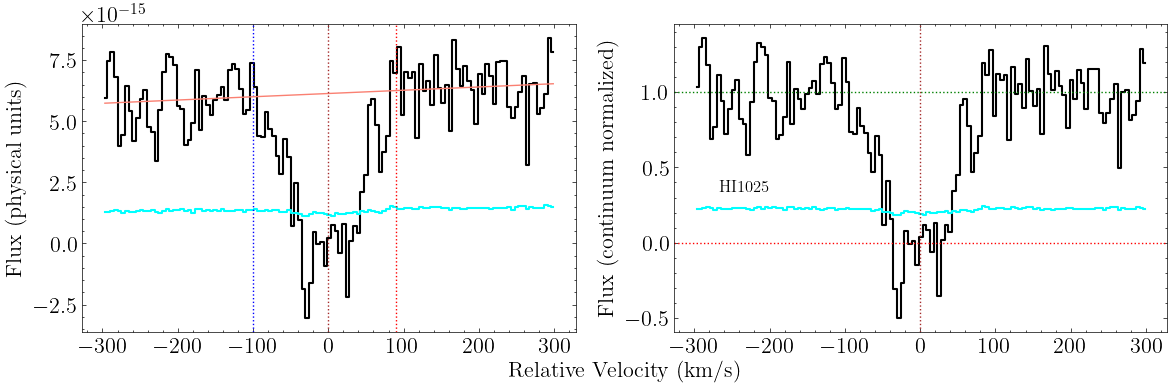

In [85]:
fig, axes = hi_1025_stis.plot_ion_transition_spec_cont()

In [86]:
hi_1025_stis.get_EW_total(-100,90)

Integration window: [-100, 90]
EW, 1sig: 411, 22
EW-3sig: 65


In [87]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [88]:
hi_1025_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

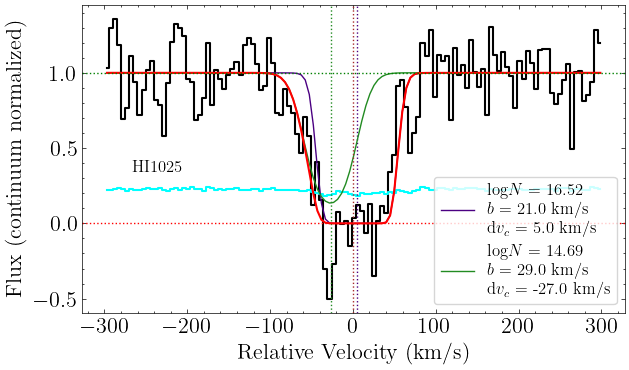

In [89]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

In [90]:
hi_1025_stis.fit_ion_transition()

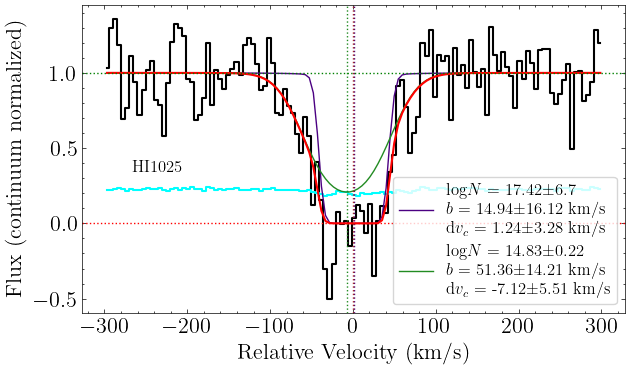

In [91]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit()

## HI 972 (STIS)

In [92]:
hi_972_stis = ion_transition('HI', 972, 'H', z_sys, 'STIS')

In [93]:
hi_972_stis.grab_ion_transition_info()

In [94]:
hi_972_stis.grab_ion_transition_spec(spec_fits_list)

In [95]:
hi_972_stis.cont_norm_flux(renorm=True, v_abs_range=[-80,80], degree=1)

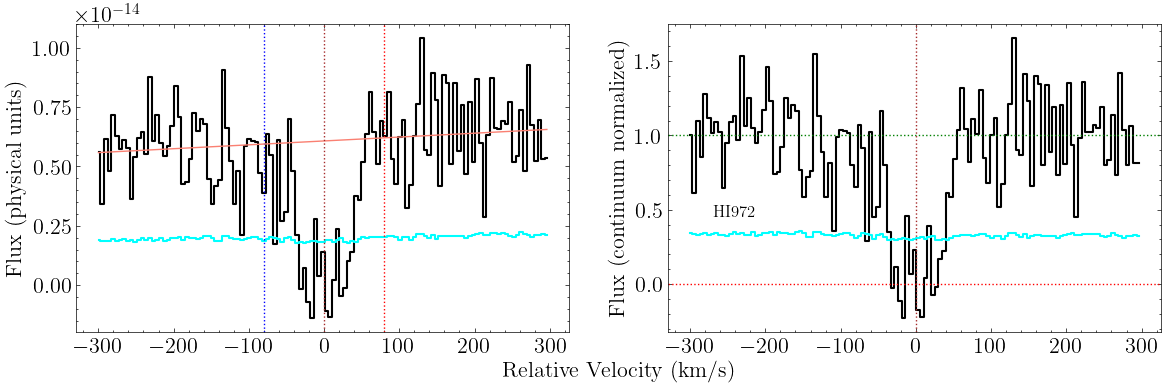

In [96]:
fig, axes = hi_972_stis.plot_ion_transition_spec_cont()

In [97]:
hi_972_stis.get_EW_total(-80,80)

Integration window: [-80, 80]
EW, 1sig: 280, 28
EW-3sig: 84


In [98]:
hi_972_stis.grab_ion_transition_lsf(lsf_fits_list)

In [99]:
hi_972_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

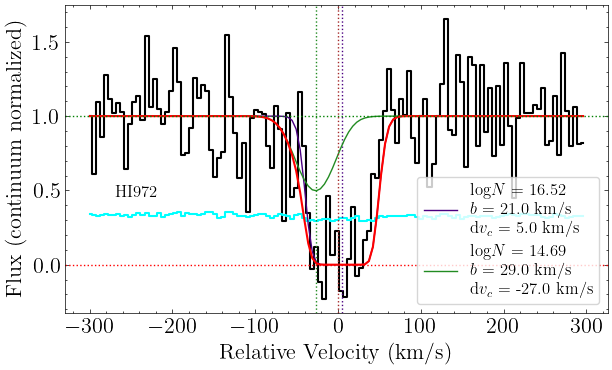

In [100]:
fig, ax = hi_972_stis.plot_ion_transition_init_fit()

In [101]:
hi_972_stis.fit_ion_transition()

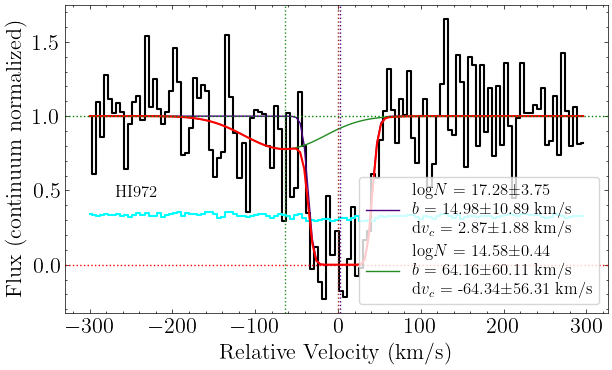

In [102]:
fig, ax = hi_972_stis.plot_ion_transition_best_fit()

## HI 949 (STIS)

In [103]:
hi_949_stis = ion_transition('HI', 949, 'H', z_sys, 'STIS')

In [104]:
hi_949_stis.grab_ion_transition_info()

In [105]:
hi_949_stis.grab_ion_transition_spec(spec_fits_list, masks=[[40,100]])

In [106]:
hi_949_stis.cont_norm_flux(renorm=True, v_abs_range=[-80,100], degree=1)

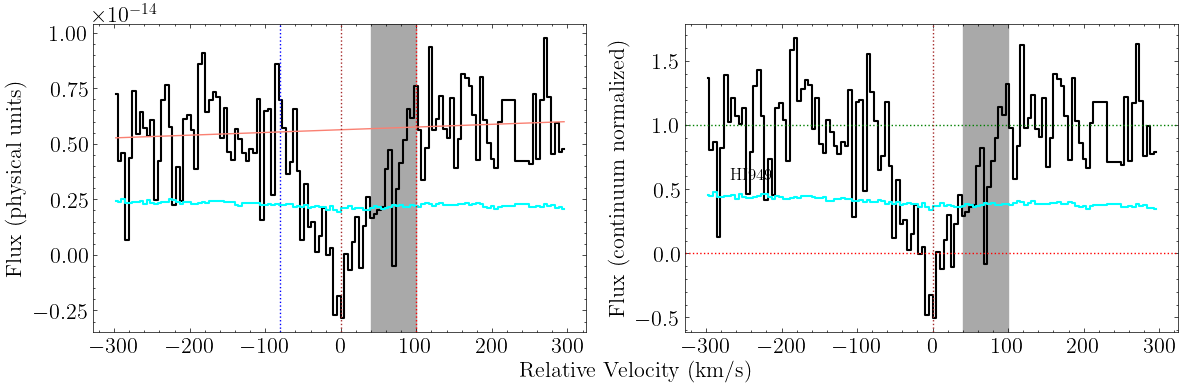

In [107]:
fig, axes = hi_949_stis.plot_ion_transition_spec_cont()

In [108]:
hi_949_stis.get_EW_total(-80,100)

Integration window: [-80, 100]
EW, 1sig: 352, 36
EW-3sig: 107


In [109]:
hi_949_stis.grab_ion_transition_lsf(lsf_fits_list)

In [110]:
hi_949_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

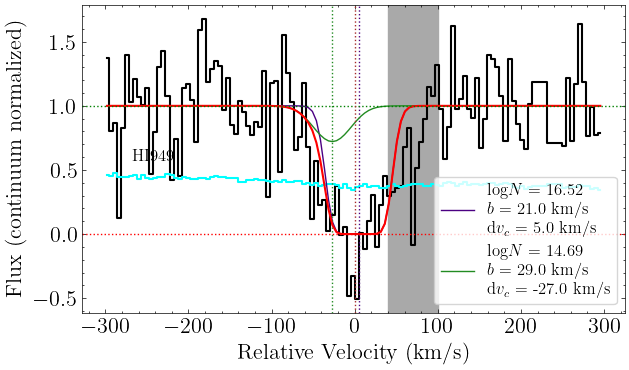

In [111]:
fig, ax = hi_949_stis.plot_ion_transition_init_fit()

In [112]:
hi_949_stis.fit_ion_transition()

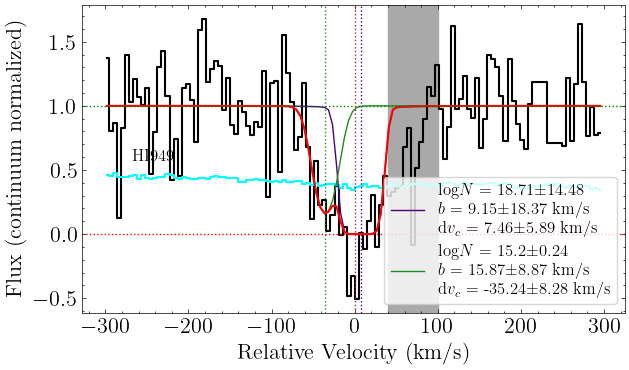

In [113]:
fig, ax = hi_949_stis.plot_ion_transition_best_fit()

## HI 937 (STIS)

In [114]:
hi_937_stis = ion_transition('HI', 937, 'H', z_sys, 'STIS')

In [115]:
hi_937_stis.grab_ion_transition_info()

In [116]:
hi_937_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-80,-40],[50,100]])

In [117]:
hi_937_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,105], degree=1)

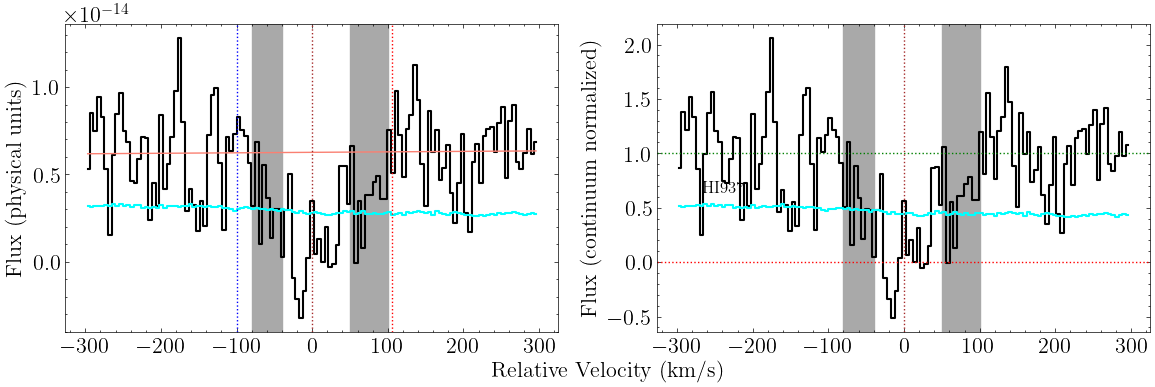

In [118]:
fig, axes = hi_937_stis.plot_ion_transition_spec_cont()

In [119]:
hi_937_stis.get_EW_total(-100,105)

Integration window: [-100, 105]
EW, 1sig: 346, 45
EW-3sig: 134


In [120]:
hi_937_stis.grab_ion_transition_lsf(lsf_fits_list)

In [121]:
hi_937_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

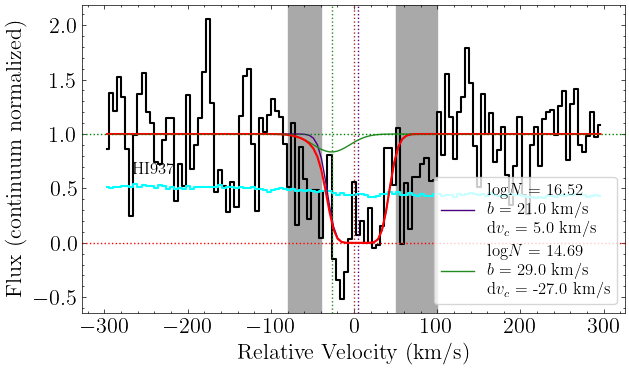

In [122]:
fig, ax = hi_937_stis.plot_ion_transition_init_fit()

In [123]:
hi_937_stis.fit_ion_transition()

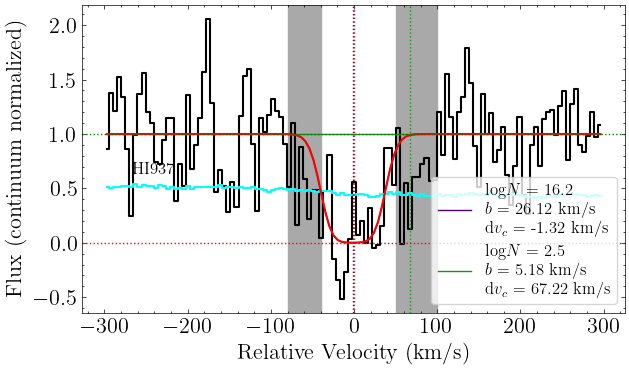

In [124]:
fig, ax = hi_937_stis.plot_ion_transition_best_fit()

## HI 937 (NUV)

In [125]:
hi_937_nuv = ion_transition('HI', 937, 'H', z_sys, 'NUV')

In [126]:
hi_937_nuv.grab_ion_transition_info()

In [127]:
hi_937_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-80,-40],[50,100]])

In [128]:
hi_937_nuv.cont_norm_flux(renorm=True, v_abs_range=[-100,105], degree=1)

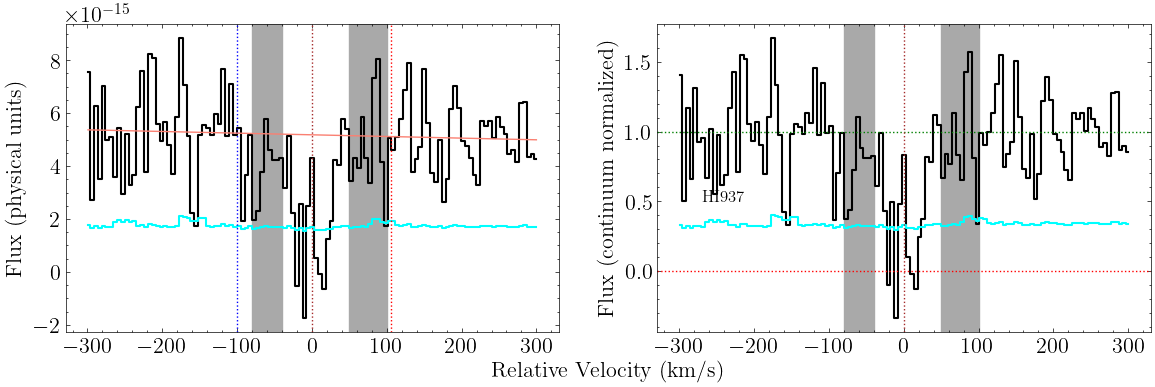

In [129]:
fig, axes = hi_937_nuv.plot_ion_transition_spec_cont()

In [130]:
hi_937_nuv.get_EW_total(-100,105)

Integration window: [-100, 105]
EW, 1sig: 212, 33
EW-3sig: 99


In [131]:
hi_937_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [132]:
hi_937_nuv.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

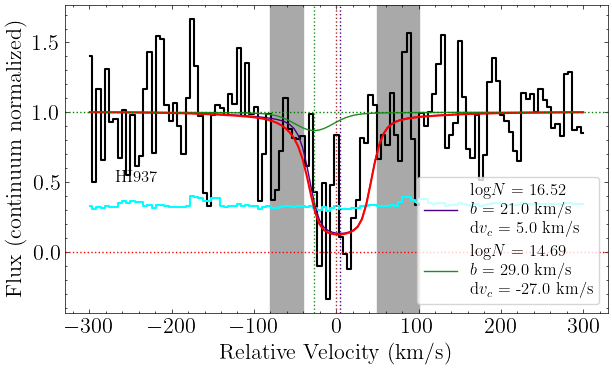

In [133]:
fig, ax = hi_937_nuv.plot_ion_transition_init_fit()

In [134]:
hi_937_nuv.fit_ion_transition()

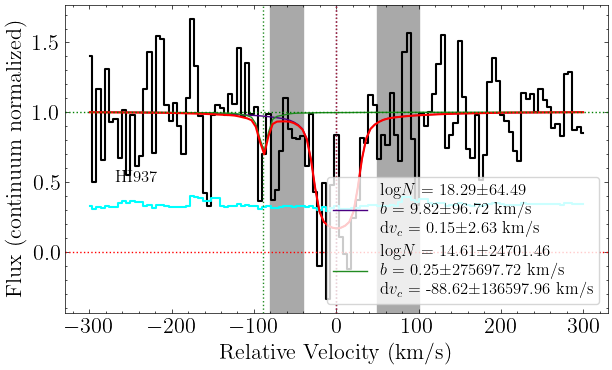

In [135]:
fig, ax = hi_937_nuv.plot_ion_transition_best_fit()

## HI 930 (STIS)

In [136]:
hi_930_stis = ion_transition('HI', 930, 'H', z_sys, 'STIS')

In [137]:
hi_930_stis.grab_ion_transition_info()

In [138]:
hi_930_stis.grab_ion_transition_spec(spec_fits_list)

In [139]:
hi_930_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

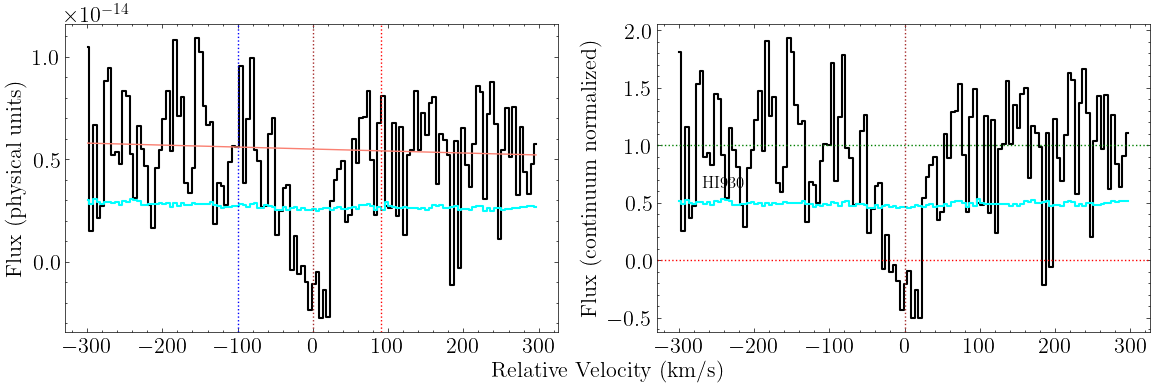

In [140]:
fig, axes = hi_930_stis.plot_ion_transition_spec_cont()

In [141]:
hi_930_stis.get_EW_total(-100,90)

Integration window: [-100, 90]
EW, 1sig: 245, 44
EW-3sig: 133


In [142]:
hi_930_stis.grab_ion_transition_lsf(lsf_fits_list)

In [143]:
hi_930_stis.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

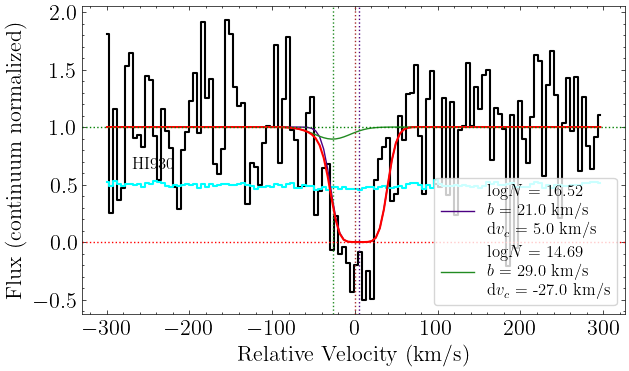

In [144]:
fig, ax = hi_930_stis.plot_ion_transition_init_fit()

In [145]:
hi_930_stis.fit_ion_transition()

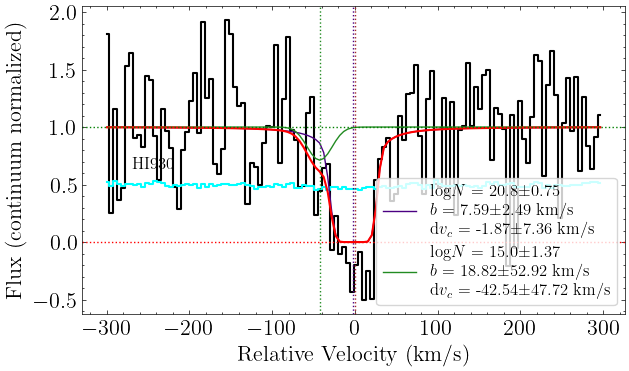

In [146]:
fig, ax = hi_930_stis.plot_ion_transition_best_fit()

## HI 930 (NUV)

In [209]:
hi_930_nuv = ion_transition('HI', 930, 'H', z_sys, 'NUV')

In [210]:
hi_930_nuv.grab_ion_transition_info()

In [211]:
hi_930_nuv.grab_ion_transition_spec(spec_fits_list)

In [212]:
hi_930_nuv.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

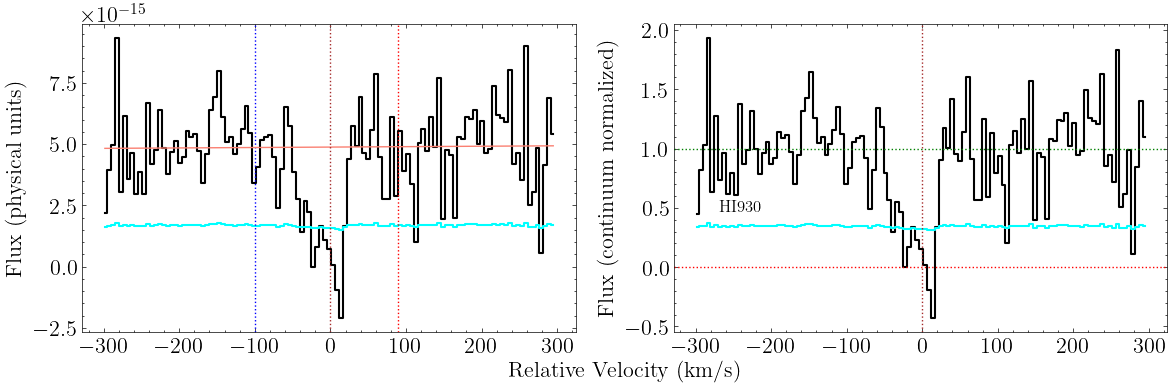

In [213]:
fig, axes = hi_930_nuv.plot_ion_transition_spec_cont()

In [214]:
hi_930_nuv.get_EW_total(-100,90)

Integration window: [-100, 90]
EW, 1sig: 170, 32
EW-3sig: 97


In [215]:
hi_930_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [216]:
hi_930_nuv.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

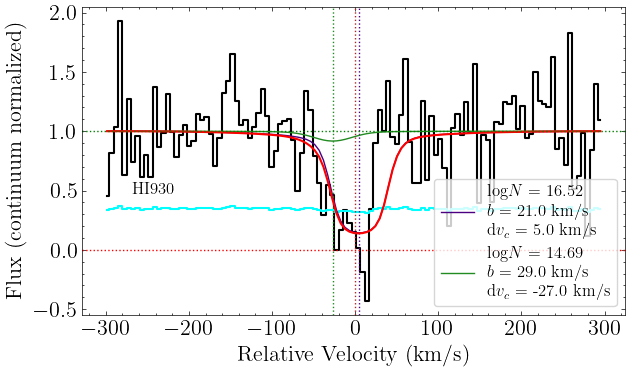

In [217]:
fig, ax = hi_930_nuv.plot_ion_transition_init_fit()

In [218]:
hi_930_nuv.fit_ion_transition()

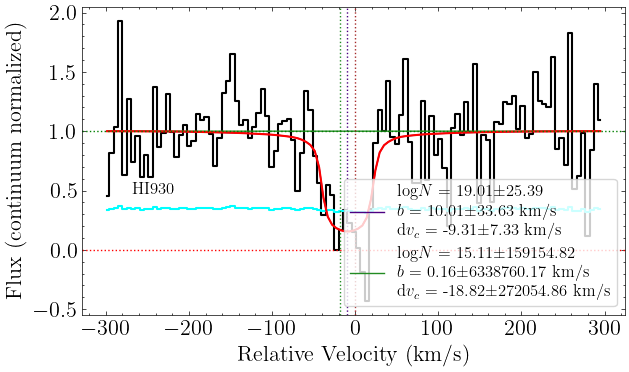

In [219]:
fig, ax = hi_930_nuv.plot_ion_transition_best_fit()

## HI 918 (NUV)

In [220]:
hi_918_nuv = ion_transition('HI', 918, 'H', z_sys, 'NUV')

In [221]:
hi_918_nuv.grab_ion_transition_info()

In [222]:
hi_918_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-100,-40]])

In [223]:
hi_918_nuv.cont_norm_flux(renorm=True, v_abs_range=[-100,90], degree=1)

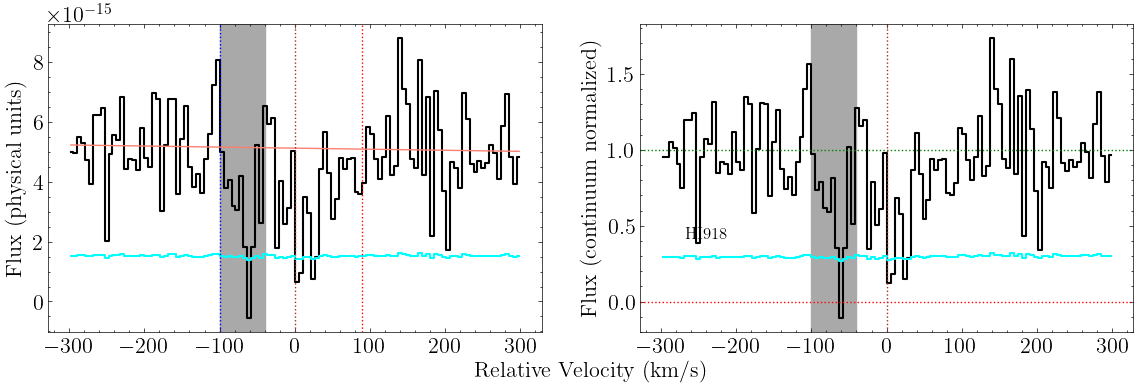

In [224]:
fig, axes = hi_918_nuv.plot_ion_transition_spec_cont()

In [225]:
hi_918_nuv.get_EW_total(-100,90)

Integration window: [-100, 90]
EW, 1sig: 179, 28
EW-3sig: 83


In [226]:
hi_918_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [227]:
hi_918_nuv.init_ion_transition(init_values = np.array([[16.52,21, 5],[14.69,29,-27]]), 
                             lsf_convolve = True)

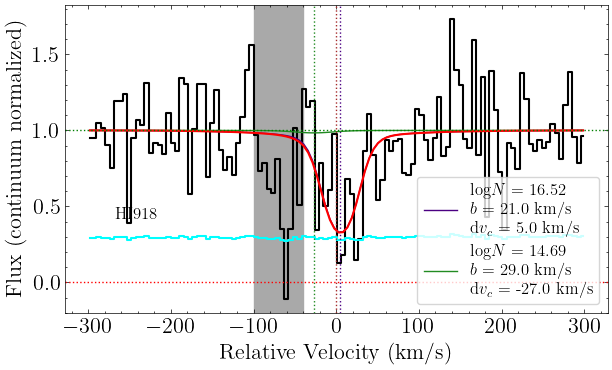

In [228]:
fig, ax = hi_918_nuv.plot_ion_transition_init_fit()

In [229]:
hi_918_nuv.fit_ion_transition()

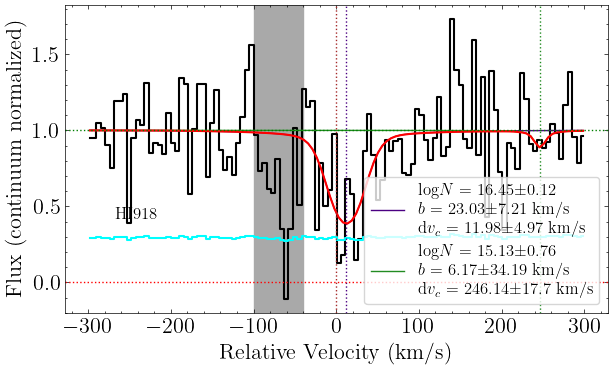

In [230]:
fig, ax = hi_918_nuv.plot_ion_transition_best_fit()

## HI ion

In [231]:
hi = ion(z_sys, 'HI', [hi_1215_stis, hi_1025_stis, hi_972_stis, hi_949_stis, 
                       hi_937_stis, hi_937_nuv,
                       hi_930_stis, hi_930_nuv,
                       hi_918_nuv])

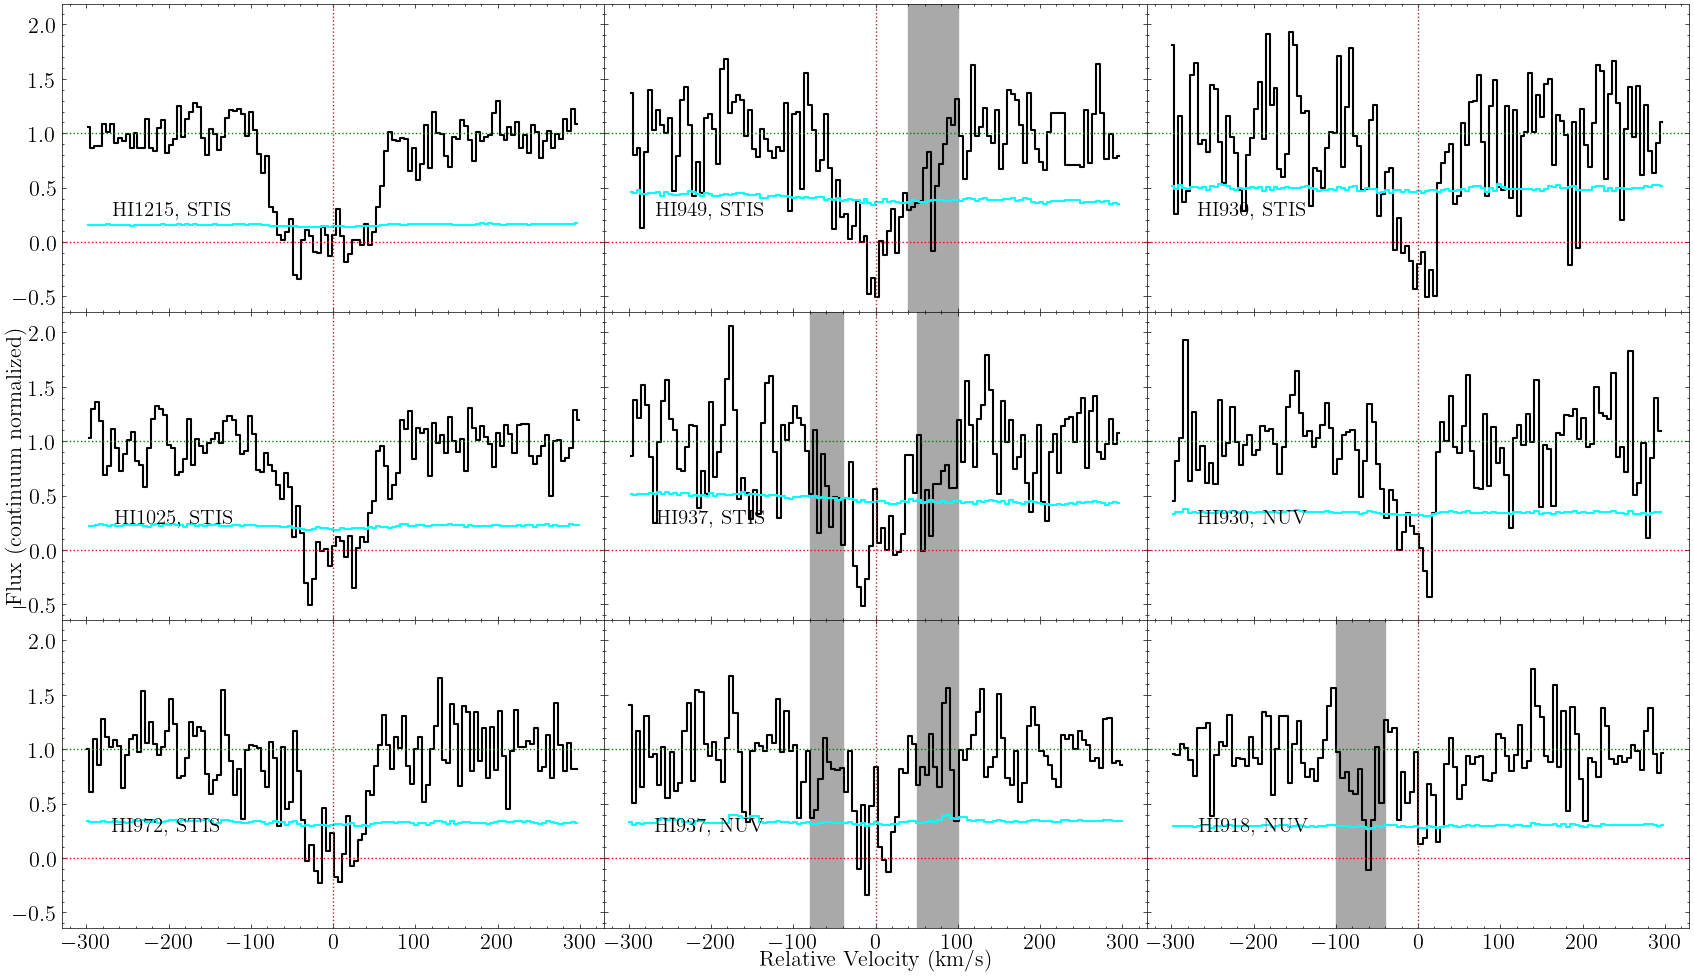

In [232]:
fig, axes = hi.plot_ion(n_cols=3)

In [233]:
hi.init_ion([[[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]],
            [[16.52,21, 5],[14.69,29,-27]]])

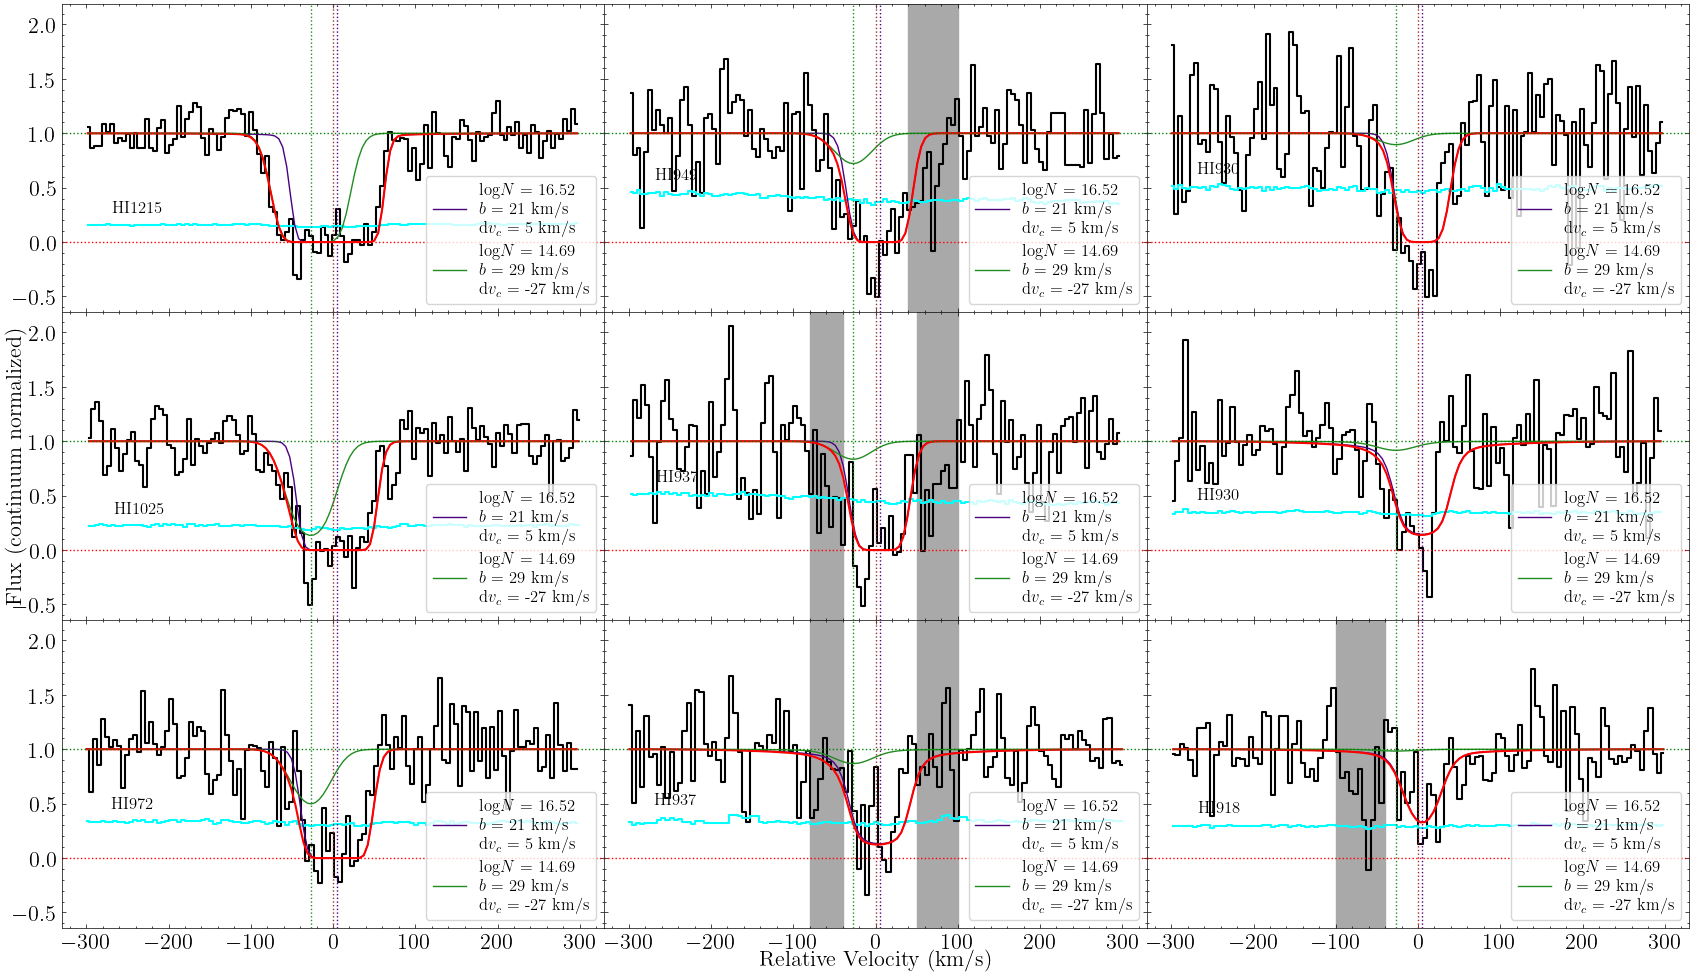

In [234]:
fig, axes = hi.plot_ion_init_fit(n_cols=3)

In [235]:
hi.fit_ion(tie_params_list=[['it1c1_logN', 'it2c1_logN'], # Tie logN for c1
                            ['it1c1_logN', 'it3c1_logN'],
                            ['it1c1_logN', 'it4c1_logN'],
                            ['it1c1_logN', 'it5c1_logN'],
                            ['it1c1_logN', 'it6c1_logN'],
                            ['it1c1_logN', 'it7c1_logN'],
                            ['it1c1_logN', 'it8c1_logN'],
                            ['it1c1_logN', 'it9c1_logN'],
                            ['it1c1_b', 'it2c1_b'], # Tie b for c1
                            ['it1c1_b', 'it3c1_b'],
                            ['it1c1_b', 'it4c1_b'],
                            ['it1c1_b', 'it5c1_b'],
                            ['it1c1_b', 'it6c1_b'],
                            ['it1c1_b', 'it7c1_b'],
                            ['it1c1_b', 'it8c1_b'],
                            ['it1c1_b', 'it9c1_b'],
                            ['it1c1_dv_c', 'it2c1_dv_c'], # Tie dv_c for c1
                            ['it1c1_dv_c', 'it3c1_dv_c'], 
                            ['it1c1_dv_c', 'it4c1_dv_c'],
                            ['it1c1_dv_c', 'it5c1_dv_c'],
                            ['it1c1_dv_c', 'it6c1_dv_c'],
                            ['it1c1_dv_c', 'it7c1_dv_c'],
                            ['it1c1_dv_c', 'it8c1_dv_c'],
                            ['it1c1_dv_c', 'it9c1_dv_c'],
                            ['it1c2_logN', 'it2c2_logN'], # Tie logN for c2
                            ['it1c2_logN', 'it3c2_logN'],
                            ['it1c2_logN', 'it4c2_logN'],
                            ['it1c2_logN', 'it5c2_logN'],
                            ['it1c2_logN', 'it6c2_logN'],
                            ['it1c2_logN', 'it7c2_logN'],
                            ['it1c2_logN', 'it8c2_logN'],
                            ['it1c2_logN', 'it9c2_logN'],
                            ['it1c2_b', 'it2c2_b'], # Tie b for c2
                            ['it1c2_b', 'it3c2_b'],
                            ['it1c2_b', 'it4c2_b'],
                            ['it1c2_b', 'it5c2_b'],
                            ['it1c2_b', 'it6c2_b'],
                            ['it1c2_b', 'it7c2_b'],
                            ['it1c2_b', 'it8c2_b'],
                            ['it1c2_b', 'it8c2_b'],
                            ['it1c2_dv_c', 'it2c2_dv_c'], # Tie dv_c for c2
                            ['it1c2_dv_c', 'it3c2_dv_c'],
                            ['it1c2_dv_c', 'it4c2_dv_c'],
                            ['it1c2_dv_c', 'it5c2_dv_c'],
                            ['it1c2_dv_c', 'it6c2_dv_c'],
                            ['it1c2_dv_c', 'it7c2_dv_c'],
                            ['it1c2_dv_c', 'it8c2_dv_c'],
                            ['it1c2_dv_c', 'it9c2_dv_c'],
                           ])
            #fix_params_list = ['it1c2_dv_c'])

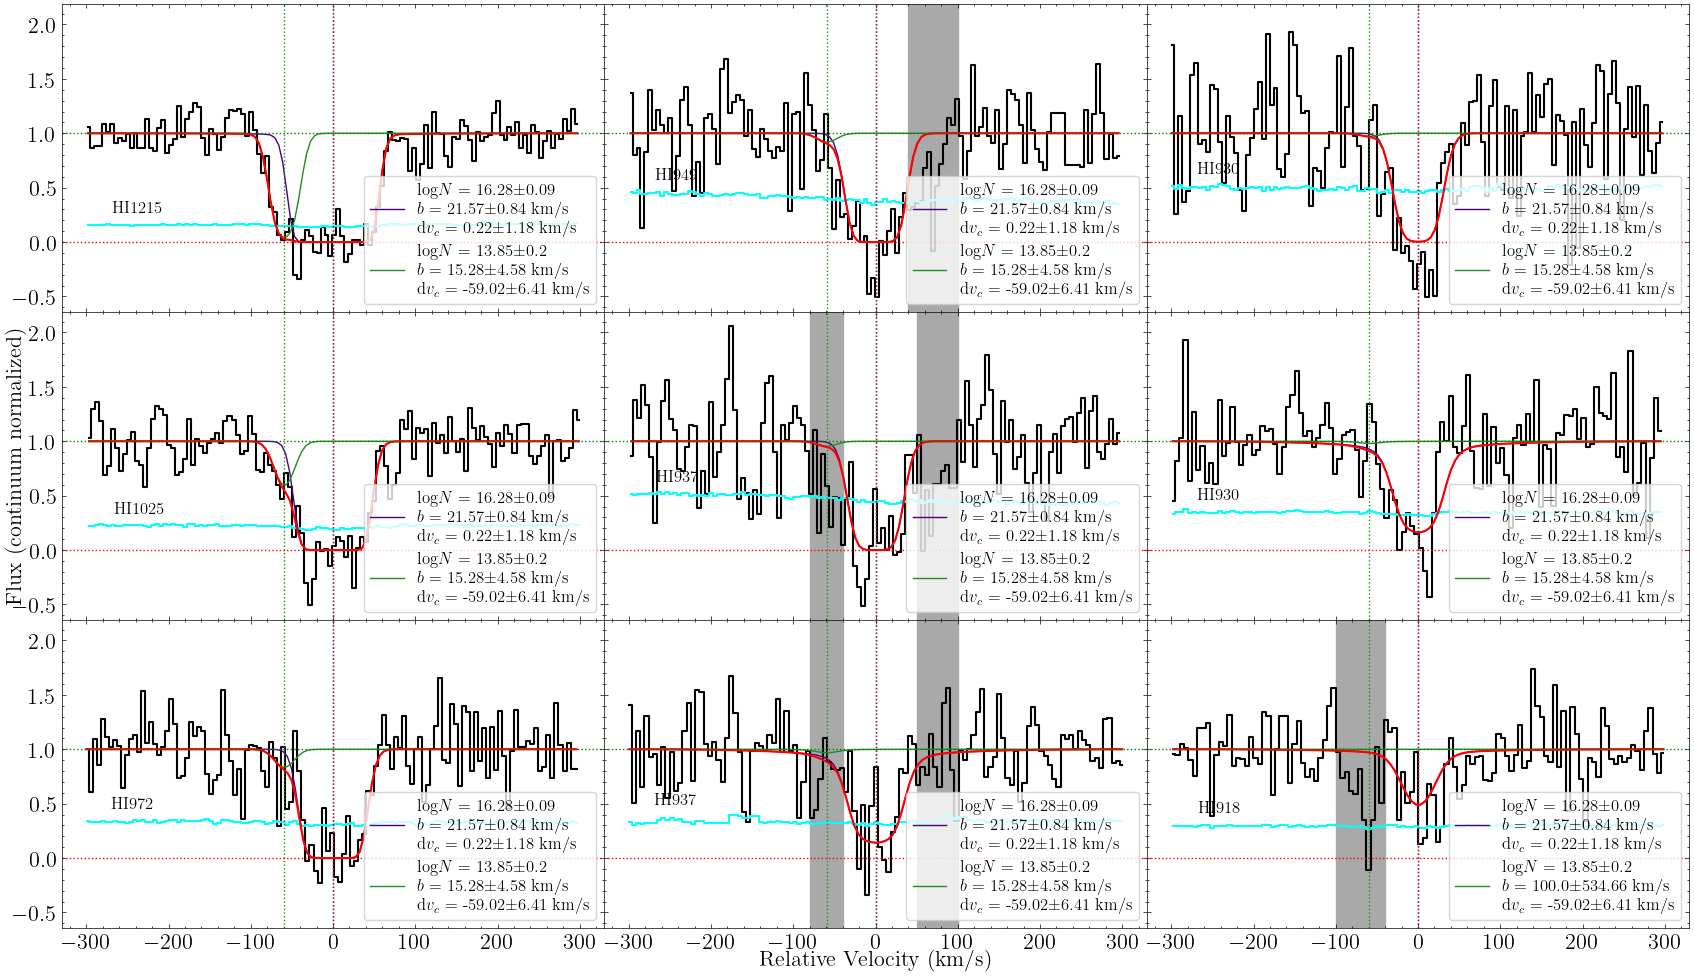

In [236]:
fig, axes = hi.plot_ion_best_fit(n_cols=3)

# MW

In [68]:
z_mw = -1.3e-4

## CaII 3969 (HIRES)

In [69]:
caii_3969_hires = ion_transition('CaII', 3969, 'Ca', z_mw, 'HIRES')

In [70]:
caii_3969_hires.grab_ion_transition_info()

In [71]:
caii_3969_hires.grab_ion_transition_spec(spec_fits_list)

In [72]:
caii_3969_hires.cont_norm_flux(renorm=False, v_abs_range=[-80,110], degree=1)

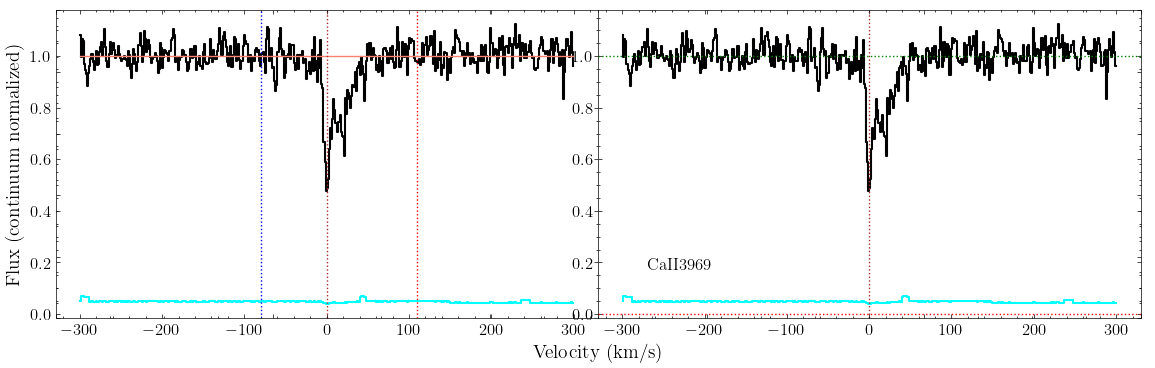

In [73]:
fig, axes = caii_3969_hires.plot_ion_transition_spec_cont()

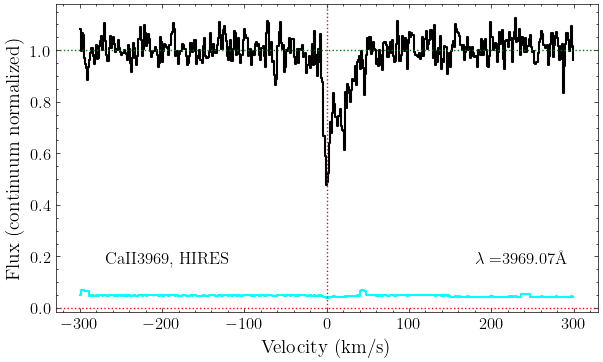

In [74]:
fig, axes = caii_3969_hires.plot_ion_transition_spec()

## CaII 3934 (HIRES)

In [75]:
caii_3934_hires = ion_transition('CaII', 3934, 'Ca', z_mw, 'HIRES')

In [76]:
caii_3934_hires.grab_ion_transition_info()

In [77]:
caii_3934_hires.grab_ion_transition_spec(spec_fits_list)

In [78]:
caii_3934_hires.cont_norm_flux(renorm=False, v_abs_range=[-80,110], degree=1)

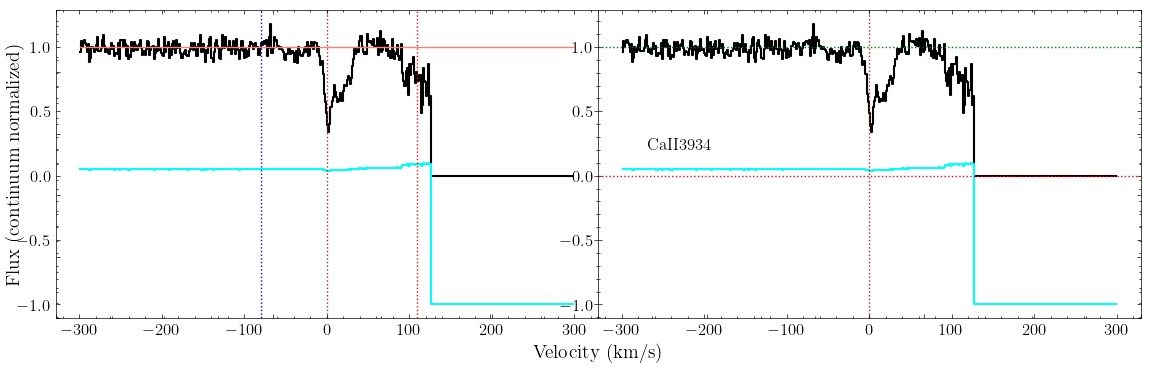

In [79]:
fig, axes = caii_3934_hires.plot_ion_transition_spec_cont()

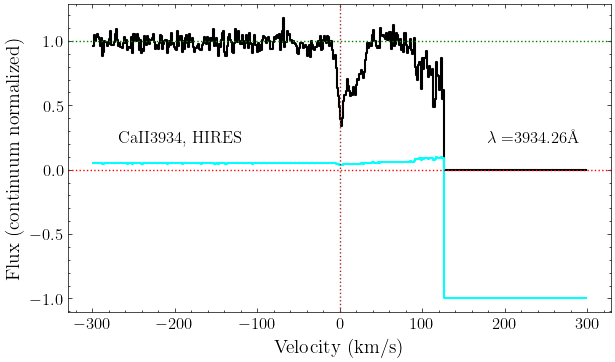

In [80]:
fig, axes = caii_3934_hires.plot_ion_transition_spec()

## CII* 1335

In [195]:
cii_1335_fuv = ion_transition('CII*', 1335, 'C', z_mw, 'FUV')

In [196]:
cii_1335_fuv.grab_ion_transition_info()

In [197]:
cii_1335_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-180]], delta_wav=0)

In [198]:
cii_1335_fuv.cont_norm_flux(renorm=True, v_abs_range=[-50,70], degree=1)

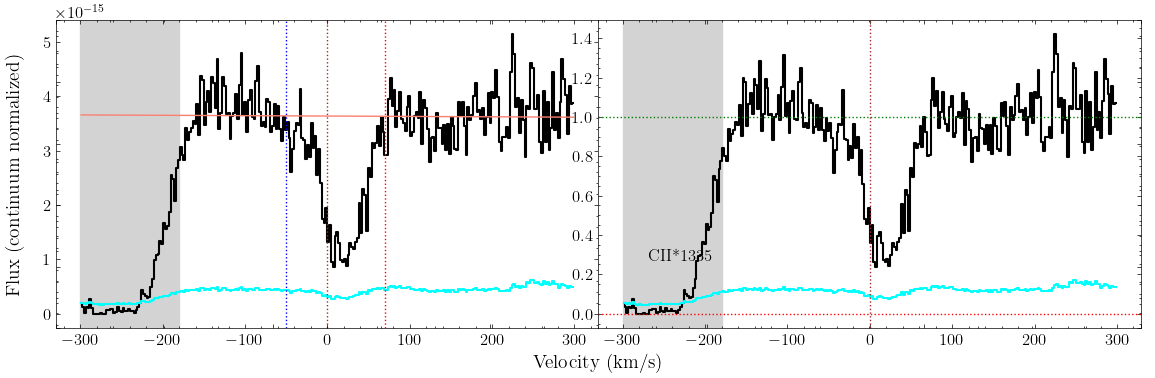

In [199]:
fig, axes = cii_1335_fuv.plot_ion_transition_spec_cont()

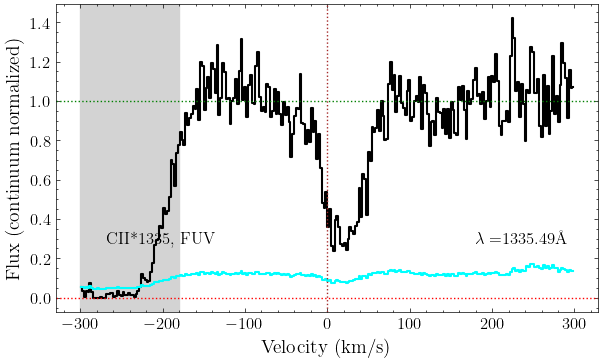

In [200]:
fig, axes = cii_1335_fuv.plot_ion_transition_spec()

## NI 1200

In [201]:
ni_1200_fuv = ion_transition('NI', 1200.71, 'N', z_mw, 'FUV')

In [202]:
ni_1200_fuv.grab_ion_transition_info()

In [203]:
ni_1200_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-230],[-170,-60]], delta_wav=0)

In [204]:
ni_1200_fuv.cont_norm_flux(renorm=True, v_abs_range=[-40,80], degree=1)

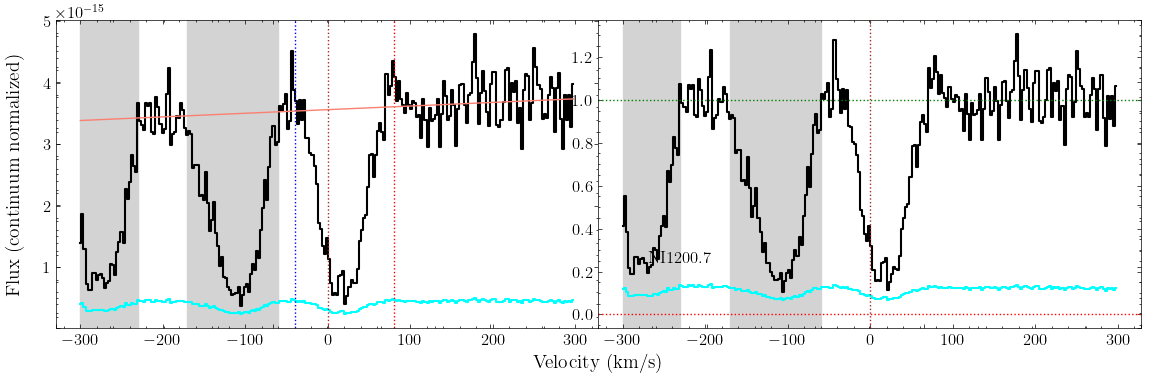

In [205]:
fig, axes = ni_1200_fuv.plot_ion_transition_spec_cont()

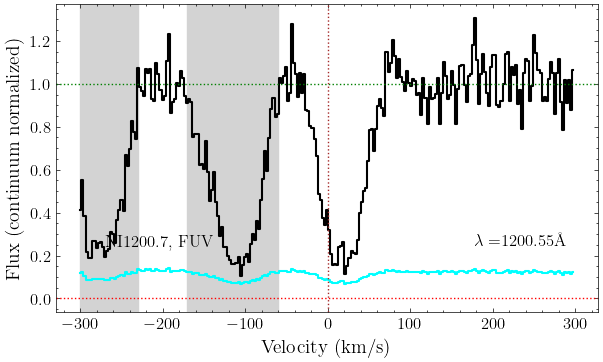

In [206]:
fig, axes = ni_1200_fuv.plot_ion_transition_spec()

# z= 1.09

In [207]:
z_sys_2 = 1.094551

## CIV

### CIV 1548 (HIRES)

In [208]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys_2, 'HIRES')

In [209]:
civ_1548_hires.grab_ion_transition_info()
#civ_1548_hires.grab_ion_transition_info(delta_v=7)

In [210]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)

In [211]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-50,70], degree=1)

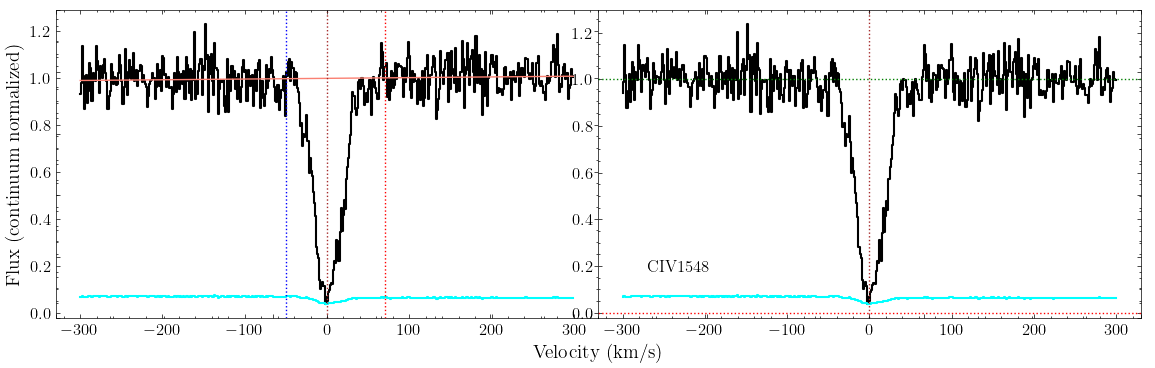

In [212]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

### CIV 1550 (HIRES)

In [213]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys_2, 'HIRES')

In [214]:
civ_1550_hires.grab_ion_transition_info()
#civ_1550_hires.grab_ion_transition_info(delta_v=7)

In [215]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])

In [216]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-40,55], degree=1)

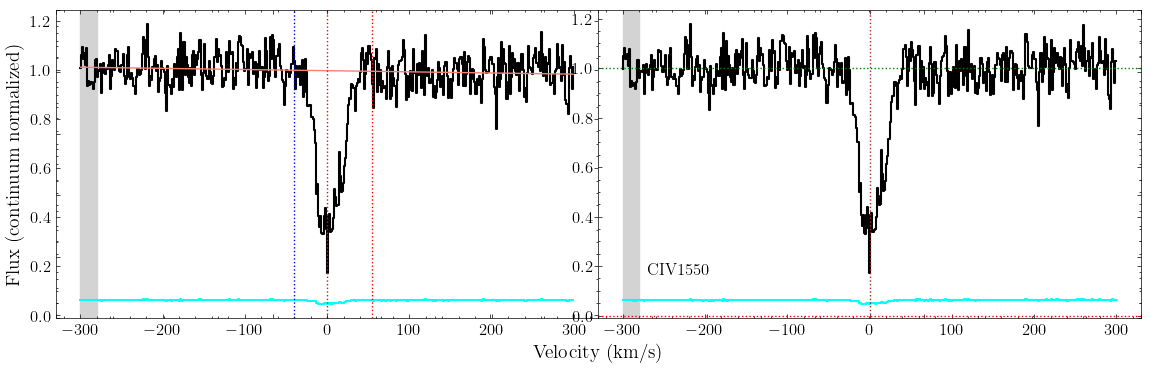

In [217]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

### CIV ion

In [218]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

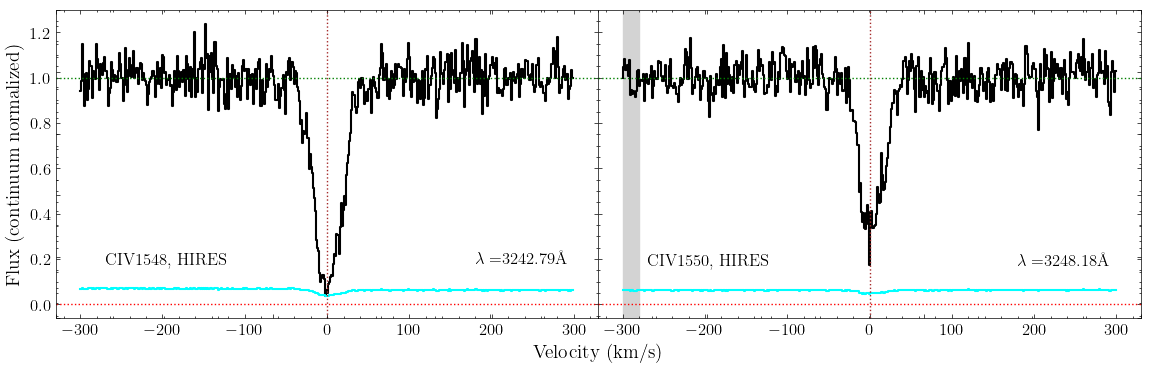

In [219]:
fig, axes = civ.plot_ion()

## OIII

### OIII 702 (FUV)

In [237]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys_2, 'FUV')

In [238]:
oiii_702_fuv.grab_ion_transition_info()

In [239]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list)#, delta_wav=0)

In [240]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-55,55], degree=1)

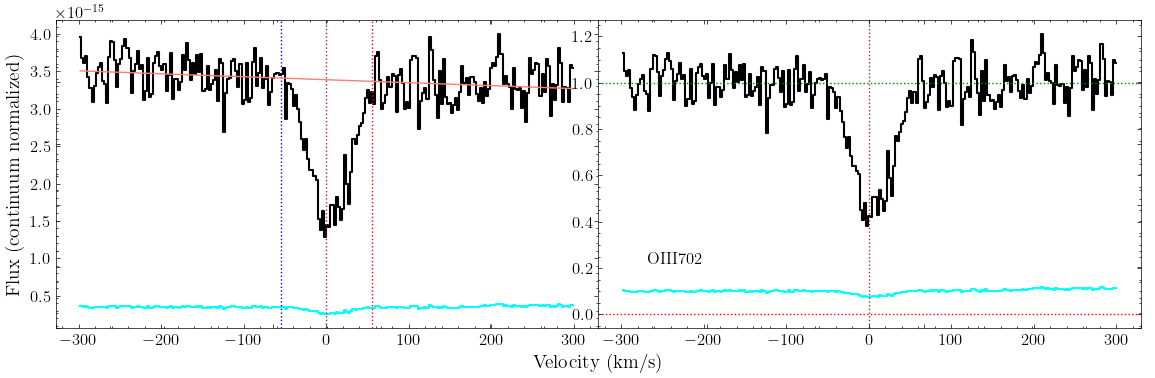

In [241]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

### OIII ion

In [242]:
oiii = ion(z_sys_2, 'OIII', [oiii_702_fuv])

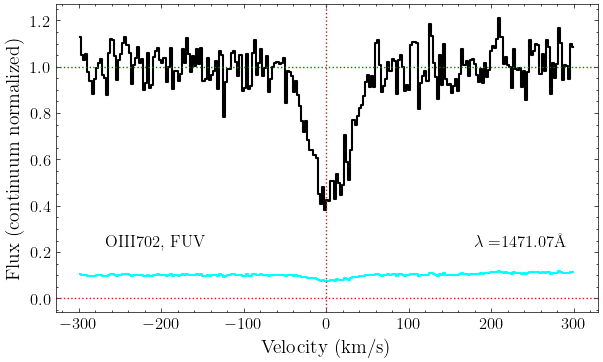

In [243]:
fig, axes = oiii.plot_ion()

## OIV

### OIV 787 (FUV)

In [244]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys_2, 'FUV')

In [245]:
oiv_787_fuv.grab_ion_transition_info()
#oiv_787_fuv.grab_ion_transition_info()

In [246]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list)#, delta_wav=0)

In [247]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-55,80], degree=1)

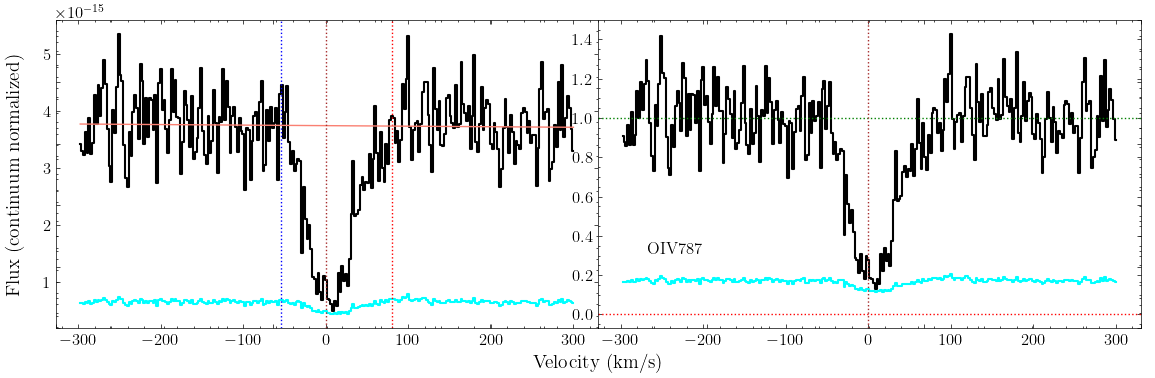

In [248]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

### OIV ion

In [249]:
oiv = ion(z_sys_2, 'OIV', [oiv_787_fuv])

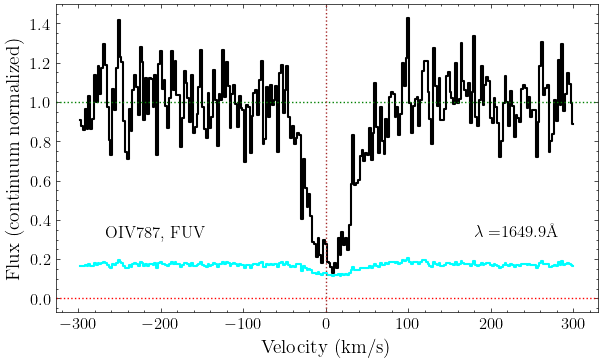

In [250]:
fig, axes = oiv.plot_ion()

## Ion suite

In [251]:
civ_oiii_oiv = ion_suite(z_sys_2, 'CIV+OIII+OIV', [civ, oiii, oiv])

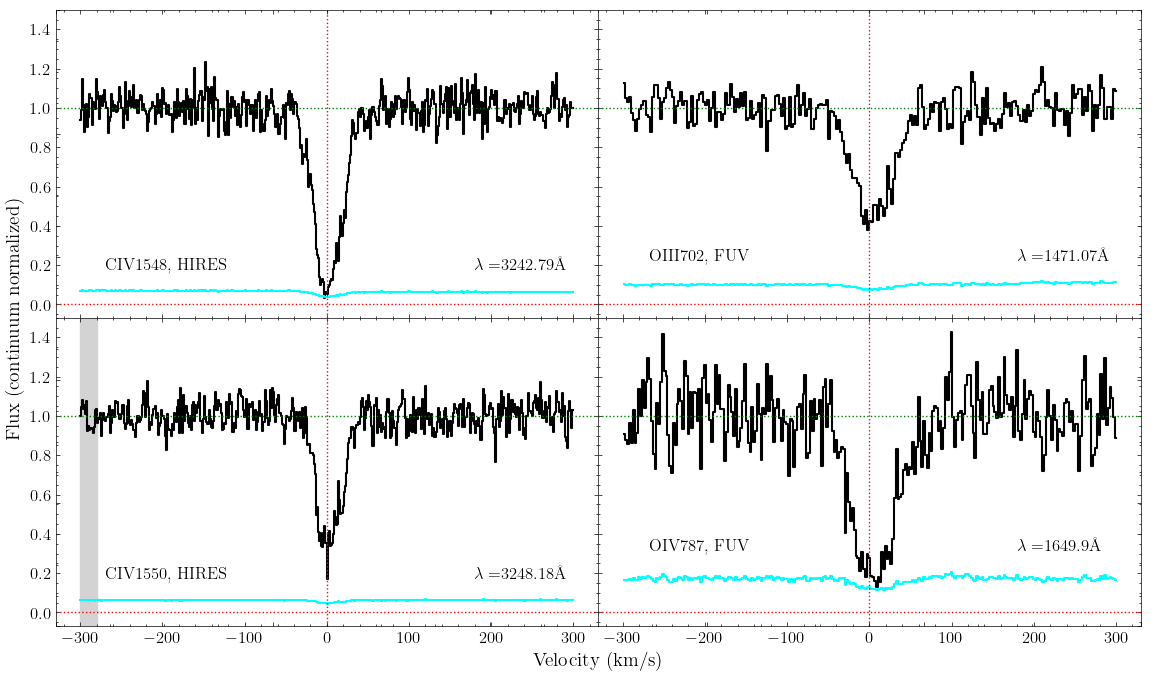

In [252]:
fig, axes = civ_oiii_oiv.plot_ion_suite(n_cols=2)

# z= 1.16

In [254]:
z_sys_3 = 1.1658994

## CIV

### CIV 1548 (HIRES)

In [255]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys_3, 'HIRES')

In [256]:
civ_1548_hires.grab_ion_transition_info()
#civ_1548_hires.grab_ion_transition_info(delta_v=7)

In [257]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)

In [258]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-50,70], degree=1)

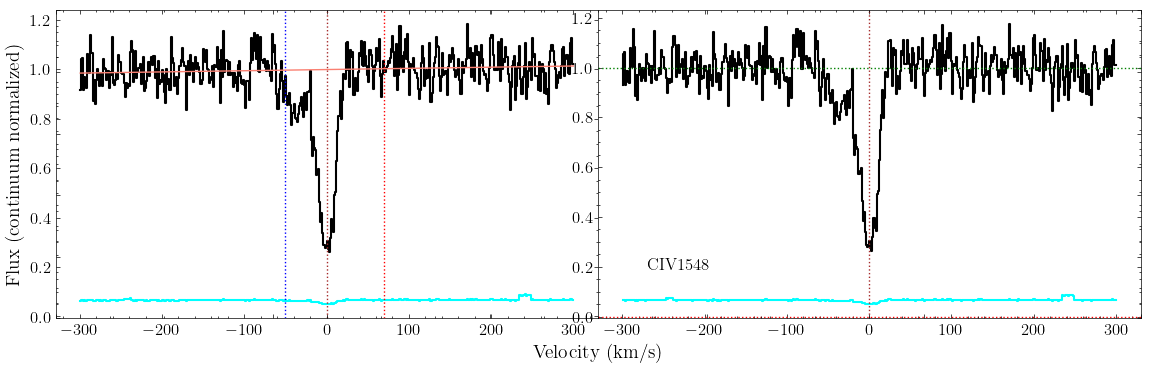

In [259]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

### CIV 1550 (HIRES)

In [260]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys_3, 'HIRES')

In [261]:
civ_1550_hires.grab_ion_transition_info()
#civ_1550_hires.grab_ion_transition_info(delta_v=7)

In [262]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])

In [263]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-40,55], degree=1)

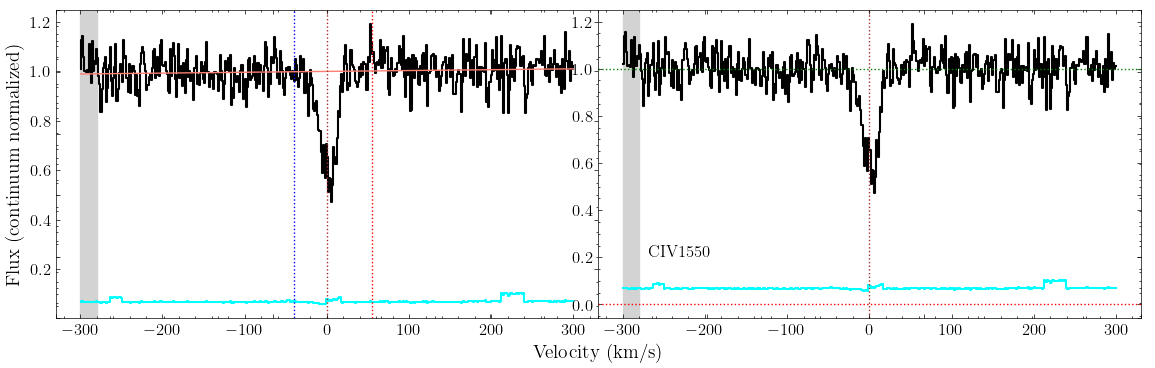

In [264]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

### CIV ion

In [265]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

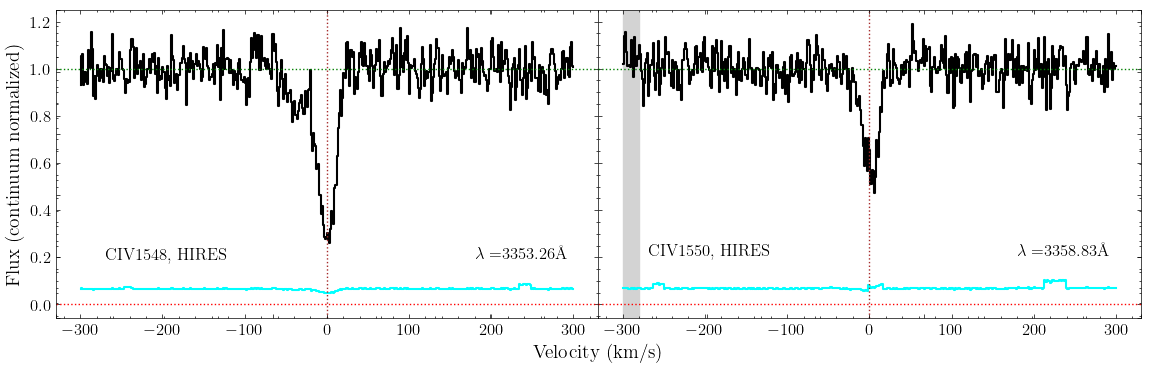

In [266]:
fig, axes = civ.plot_ion()

## OIII

### OIII 702 (FUV)

In [352]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys_3, 'FUV')

In [353]:
oiii_702_fuv.grab_ion_transition_info()

In [354]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list)#, delta_wav=0)

In [355]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-60,50], degree=1)

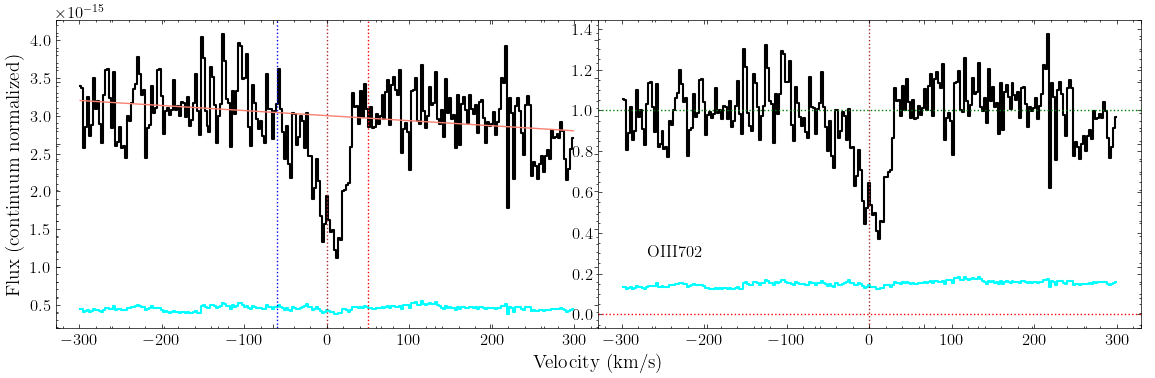

In [356]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

### OIII ion

In [357]:
oiii = ion(z_sys_3, 'OIII', [oiii_702_fuv])

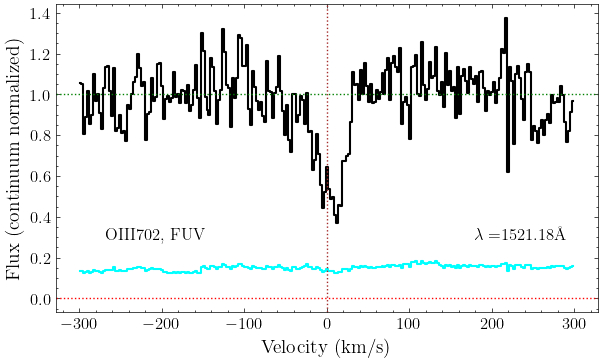

In [358]:
fig, axes = oiii.plot_ion()

## OIV

### OIV 553 (FUV)

In [359]:
oiv_553_fuv = ion_transition('OIV', 553, 'O', z_sys_3, 'FUV')

In [360]:
oiv_553_fuv.grab_ion_transition_info()

In [361]:
oiv_553_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[180,300]])#, delta_wav=0)

In [362]:
oiv_553_fuv.cont_norm_flux(v_abs_range=[-70,110], degree=1)

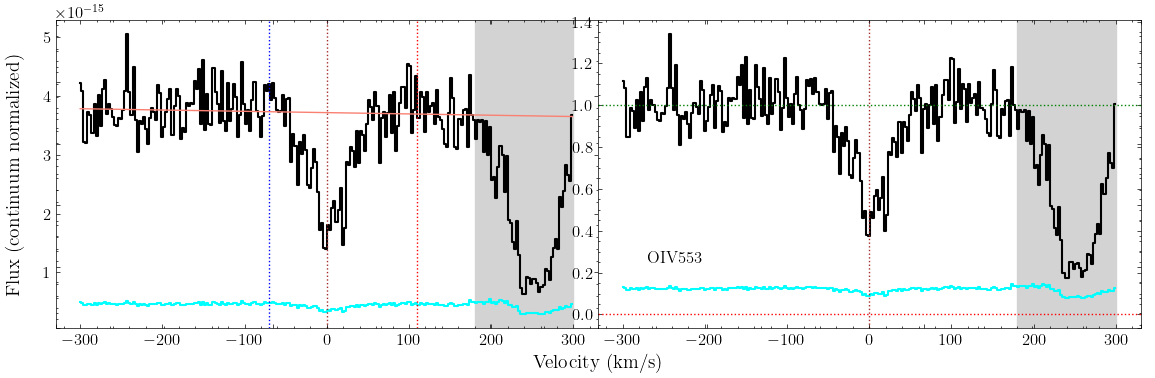

In [363]:
fig, ax = oiv_553_fuv.plot_ion_transition_spec_cont()

### OIV 608 (FUV)

In [364]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys_3, 'FUV')

In [365]:
oiv_608_fuv.grab_ion_transition_info()

In [366]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-180,-125],[200,300]])#, delta_wav=0)

In [367]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-70,110], degree=1)

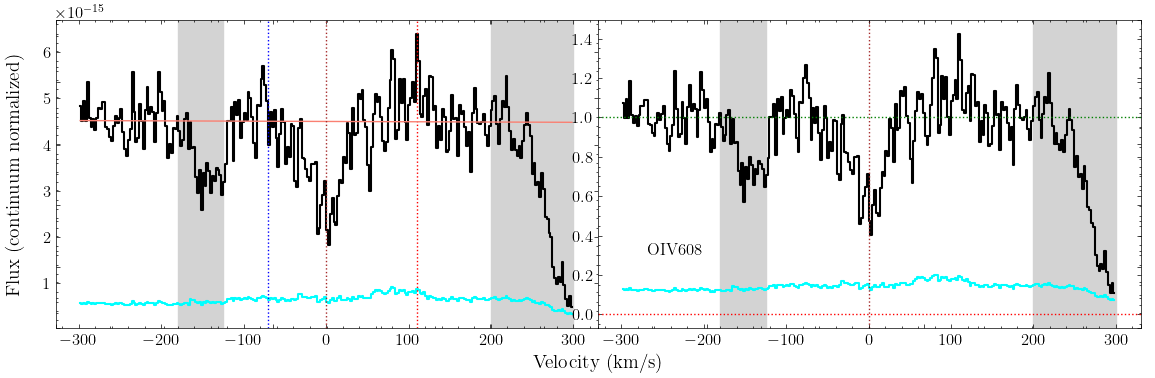

In [368]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

### OIV 787 (FUV)

In [369]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys_3, 'FUV')

In [370]:
oiv_787_fuv.grab_ion_transition_info()
#oiv_787_fuv.grab_ion_transition_info()

In [371]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-150,-110],[155,200]])#, delta_wav=0)

In [372]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-65,80], degree=1)

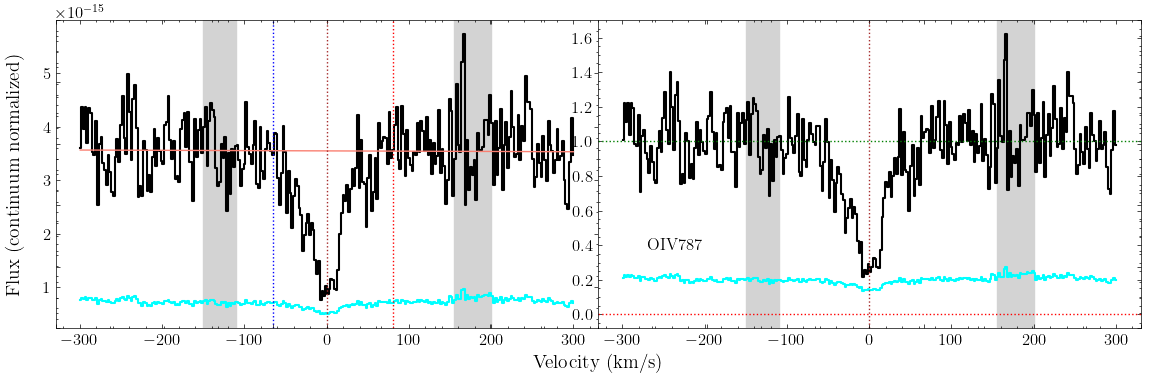

In [373]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

### OIV ion

In [374]:
oiv = ion(z_sys_3, 'OIV', [oiv_553_fuv, oiv_608_fuv, oiv_787_fuv])

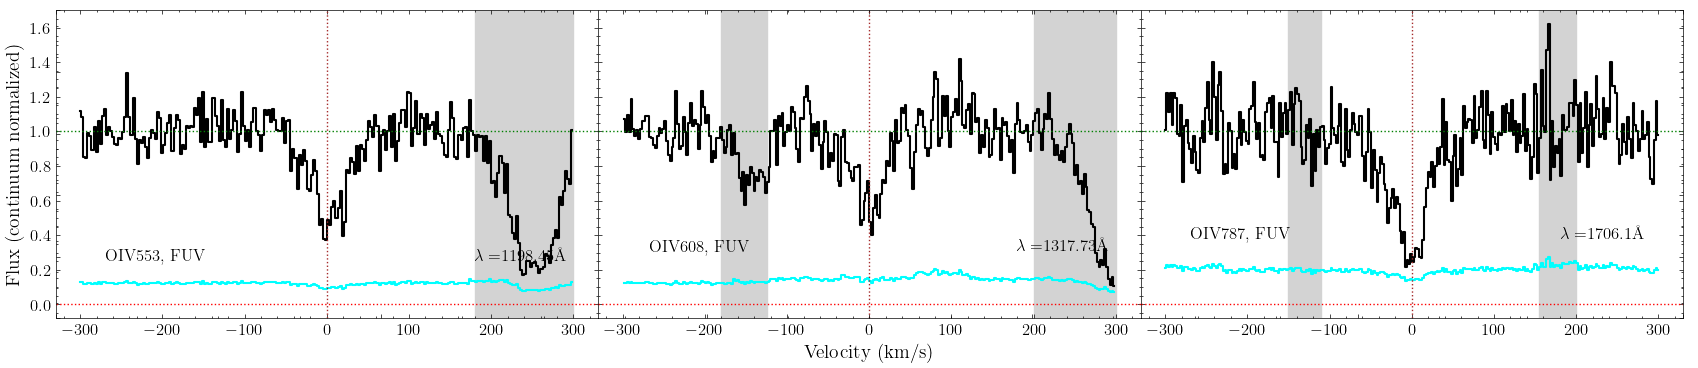

In [375]:
fig, axes = oiv.plot_ion(n_cols=3)

## Ion suite

In [376]:
civ_oiii_oiv = ion_suite(z_sys_3, 'CIV+OIII+OIV', [civ, oiii, oiv])

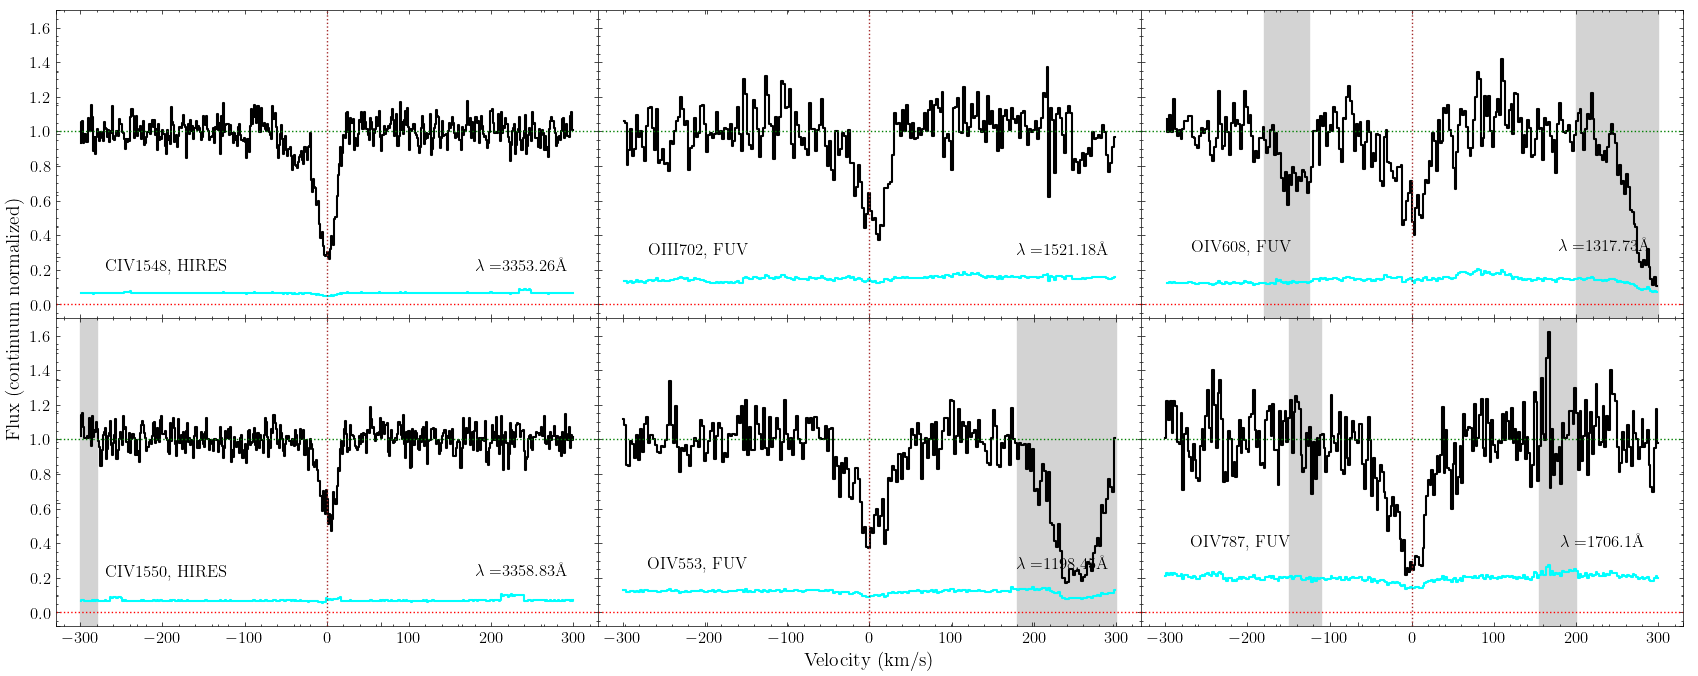

In [377]:
fig, axes = civ_oiii_oiv.plot_ion_suite(n_cols=3)

# z= 1.04

In [378]:
z_sys_4 = 1.04429485

## CIV

### CIV 1548 (HIRES)

In [379]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys_4, 'HIRES')

In [380]:
civ_1548_hires.grab_ion_transition_info()
#civ_1548_hires.grab_ion_transition_info(delta_v=7)

In [382]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list, delta_wav=0)

In [391]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-40,140],  degree=1)

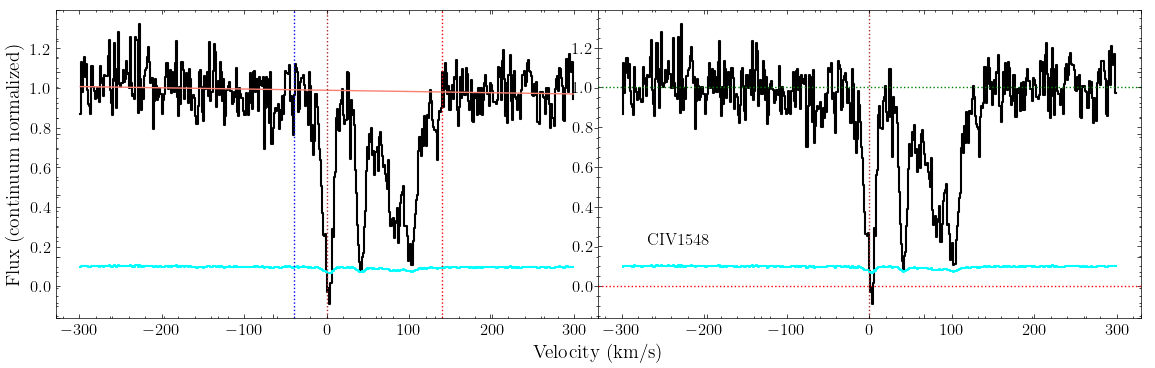

In [392]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

### CIV 1550 (HIRES)

In [393]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys_4, 'HIRES')

In [394]:
civ_1550_hires.grab_ion_transition_info()
#civ_1550_hires.grab_ion_transition_info(delta_v=7)

In [395]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]], delta_wav=0)

In [396]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-40,170], degree=1)

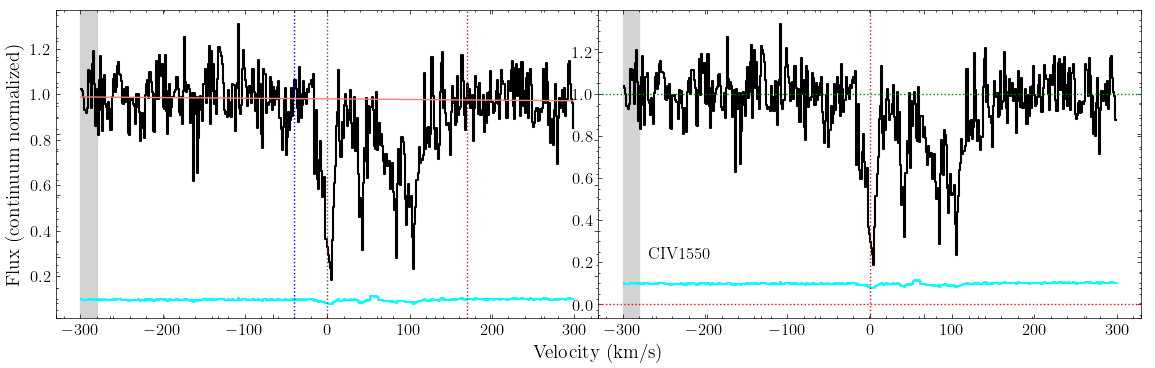

In [397]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

### CIV ion

In [398]:
civ = ion(z_sys_4, 'CIV', [civ_1548_hires, civ_1550_hires])

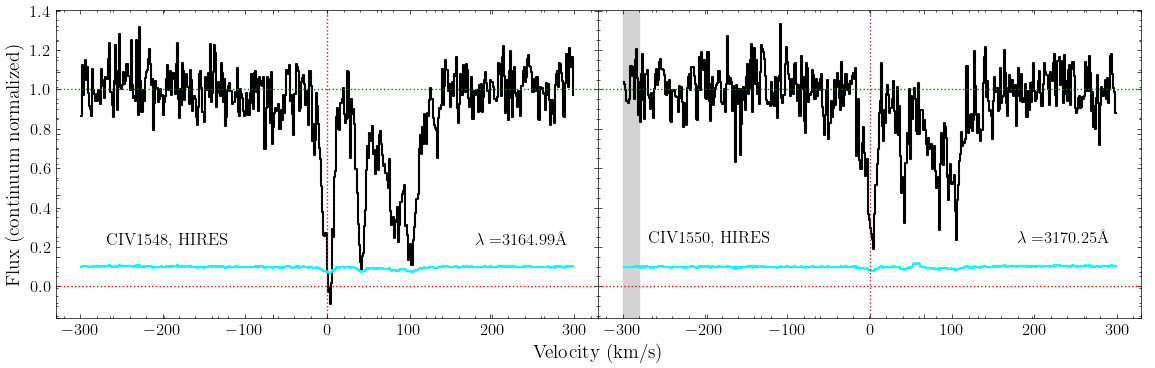

In [399]:
fig, axes = civ.plot_ion()

## OIII

### OIII 832 (FUV)

In [415]:
oiii_832_fuv = ion_transition('OIII', 832, 'O', z_sys_4, 'FUV')

In [416]:
oiii_832_fuv.grab_ion_transition_info()

In [436]:
oiii_832_fuv.grab_ion_transition_spec(spec_fits_list)

In [437]:
oiii_832_fuv.cont_norm_flux(v_abs_range=[-40,170], degree=1)

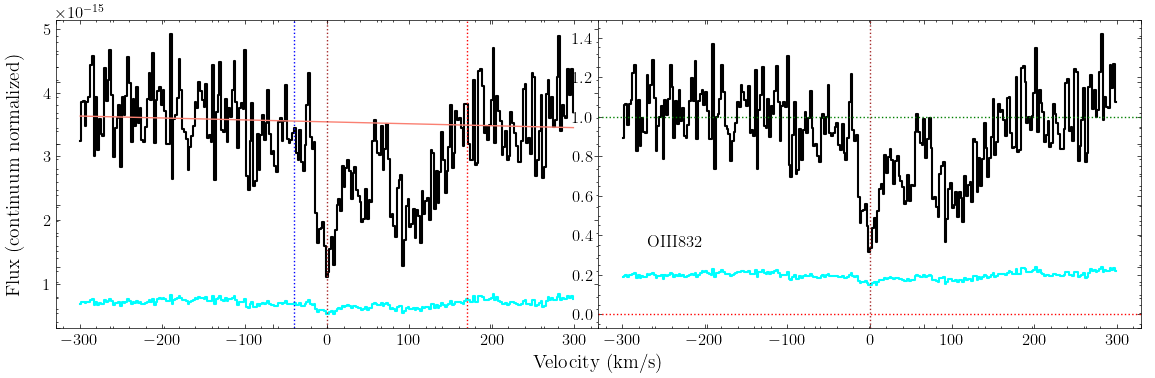

In [438]:
fig, ax = oiii_832_fuv.plot_ion_transition_spec_cont()

### OIII ion

In [439]:
oiii = ion(z_sys_4, 'OIII', [oiii_832_fuv])

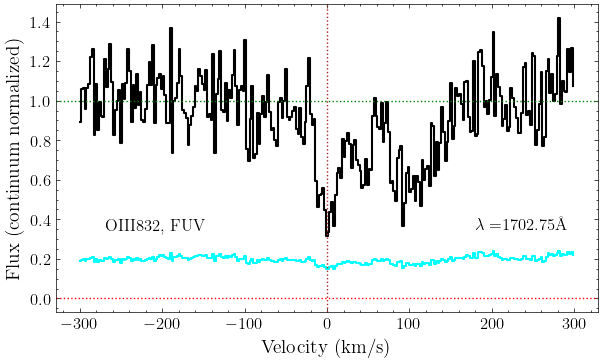

In [440]:
fig, axes = oiii.plot_ion()

## OIV

### OIV 608 (FUV)

In [441]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys_4, 'FUV')

In [442]:
oiv_608_fuv.grab_ion_transition_info()

In [443]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-150]])

In [444]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-50,140], degree=1)

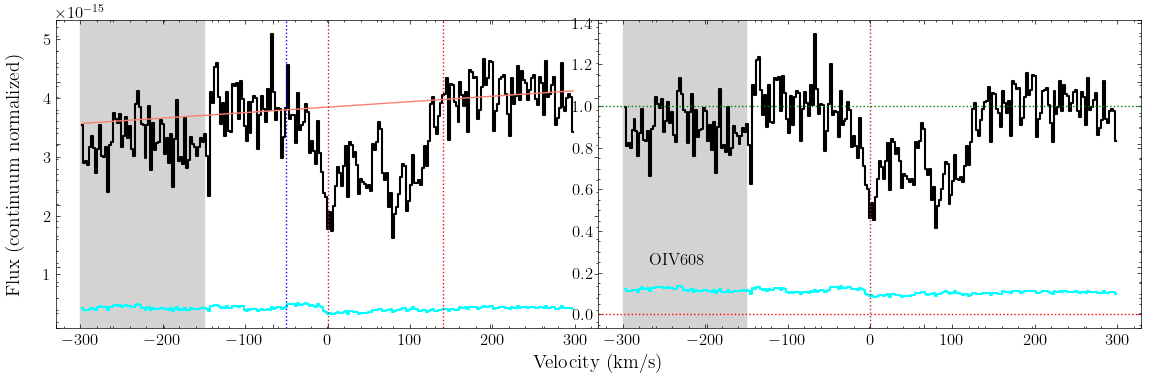

In [445]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

### OIV 787 (FUV)

In [446]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys_4, 'FUV')

In [447]:
oiv_787_fuv.grab_ion_transition_info()
#oiv_787_fuv.grab_ion_transition_info()

In [448]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-150]])

In [449]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-70,160], degree=1)

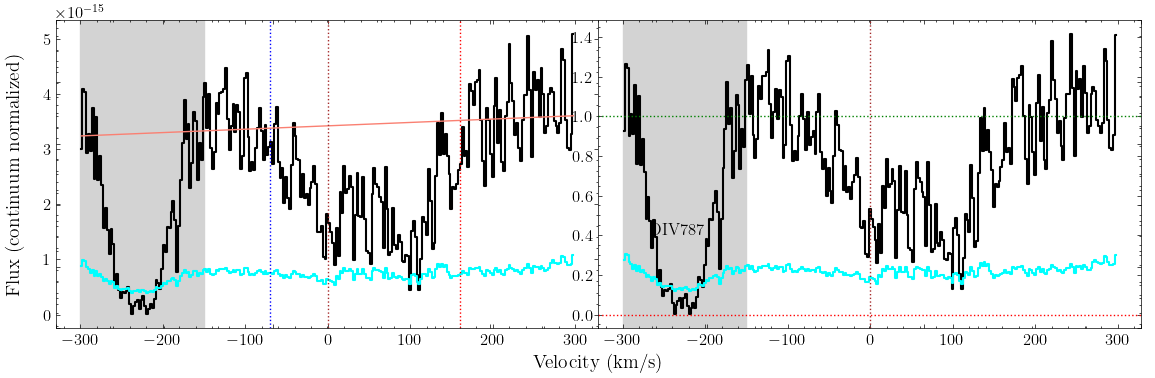

In [450]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

### OIV ion

In [451]:
oiv = ion(z_sys_4, 'OIV', [oiv_608_fuv, oiv_787_fuv])

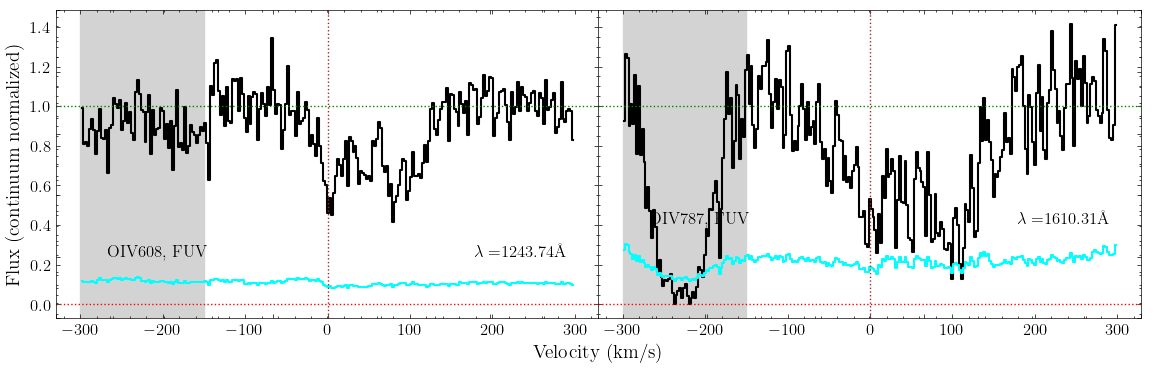

In [452]:
fig, axes = oiv.plot_ion(n_cols=2)

## Ion suite

In [453]:
civ_oiii_oiv = ion_suite(z_sys_4, 'CIV+OIII+OIV', [civ, oiii, oiv])

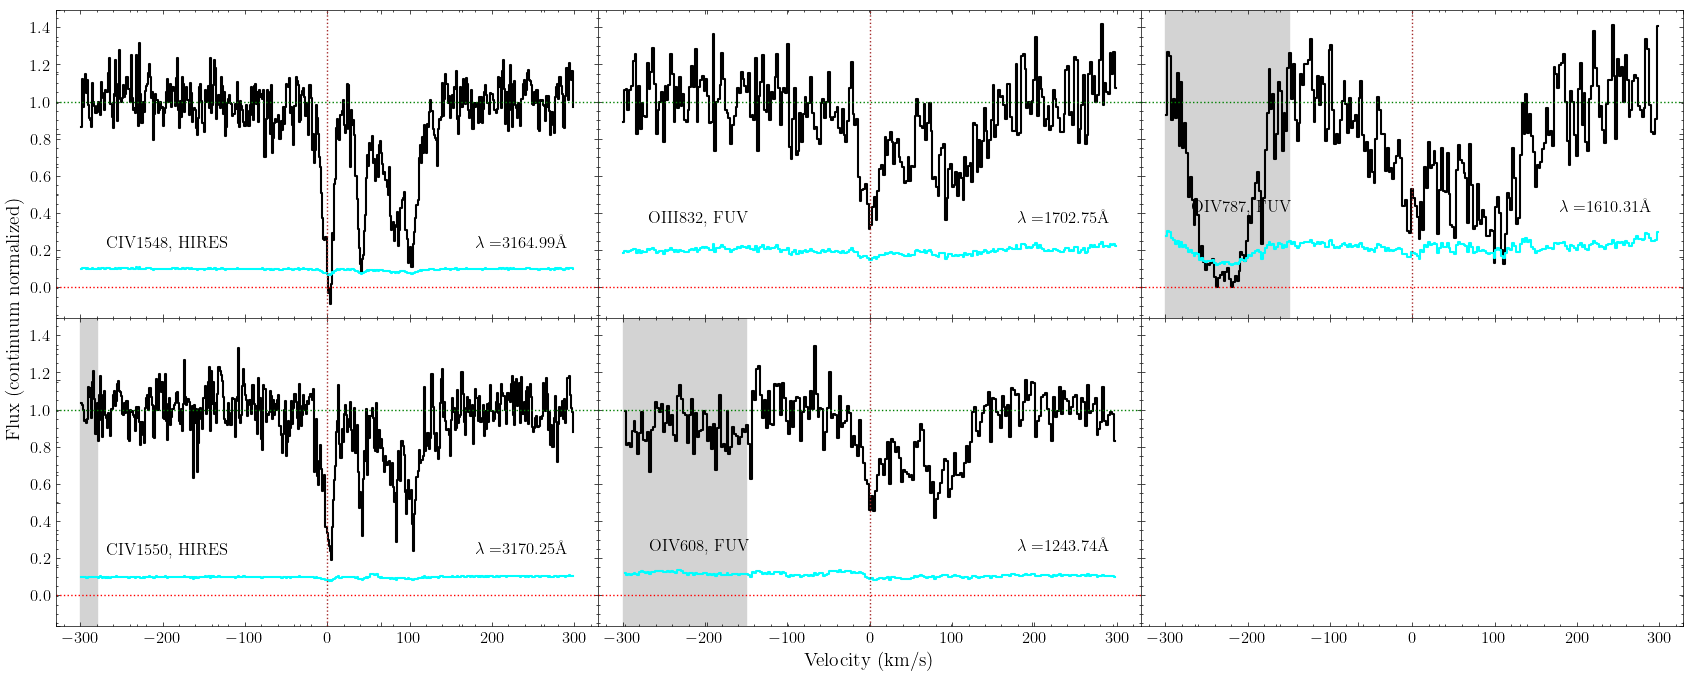

In [454]:
fig, axes = civ_oiii_oiv.plot_ion_suite(n_cols=3)